# Desafio - Regressão
# Calculadora de Precificação de Imóveis

### Proposto por Marcus Oliveira da Silva (QuintoAndar)
### Resolução por Daniel Jullien

## Índice
* [Introdução](#introduction)
* [Metodologia](#methodology)
* [Aquisição de Dados](#data)
* [EDA](#EDA)
* [Modelo com interpretabilidade](#interpretabilidade)
* [Preprocessamento de Dados](#datacleaning)
* [Modelo preditivo](#preditivo)
* [Conclusão](#conclusão)
* [Referências](#references)

## 1. Introdução <a name="introduction"></a>

## 2. Metodologia<a name="methodology"></a>

## 3. Aquisição de Dados<a name="data"></a>

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Bibliotecas de estatística
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import shapiro, skew
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bibliotecas de Pre Processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders.target_encoder import TargetEncoder

# Bibliotecas de Machine Learning
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Feature importance
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df_raw = pd.read_csv('base.csv')
# df_raw = pd.read_csv("https://raw.githubusercontent.com/danieljullien/Precificacao-de-Imoveis_DesafioQuintoAndar/main/Database/base.csv")
df_raw.head()

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1            60         RL     65.0         8450  Pave  NaN       Reg   
1   2            20         RL     80.0         9600  Pave  NaN       Reg   
2   3            60         RL     68.0        11250  Pave  NaN       IR1   
3   4            70         RL     60.0         9550  Pave  NaN       IR1   
4   5            60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao  Qualidade  Condicao  AnoConstrucao  \
0          1Fam          2Story          7         5           2003   
1          1Fam          1Story          6         8           1976   
2          1Fam          2Story          7         5           2001   
3          1Fam          2Story          7         5           1915   
4          1Fam          2Story          8         5           2000   

   AnoReforma TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0        2003       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1        1976       Gable         CompShg   MetalSd   MetalSd          None   
2        2002       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3        1970       Gable         CompShg   Wd Sdng   Wd Shng          None   
4        2000       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0        

In [3]:
df_raw.shape

(1460, 81)

## 4. EDA <a name="EDA"></a>

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [5]:
df_raw.rename(columns={'BedroomAbvGr': 'Quartos', 
                       'KitchenAbvGr': 'Cozinha', 
                       'QualdiadeLareira':'QualidadeLareira'}, inplace=True)

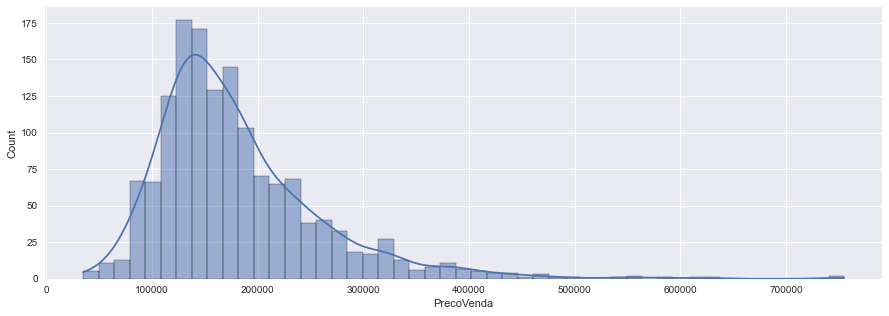

In [6]:
fig, eixo = plt.subplots(figsize=(15,5)) 
sns.histplot(df_raw,  x='PrecoVenda', kde=True)
plt.show()

In [7]:
df_raw['PrecoVenda'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: PrecoVenda, dtype: float64

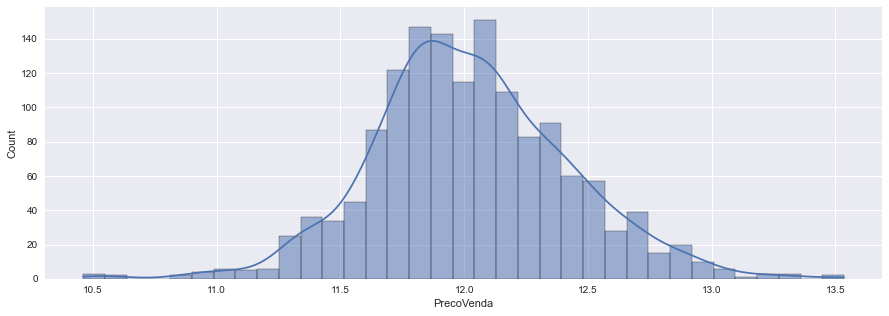

In [8]:
fig, eixo = plt.subplots(figsize=(15,5)) 
sns.histplot(np.log(df_raw['PrecoVenda']), kde=True)
plt.show()

In [9]:
def find_missing(data):
    '''
    Função para identificar e listar as variáveis com valores faltantes
    '''
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissing':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])), ignore_index=True)
        miss_df = miss_df[miss_df['PercentMissing']>0].sort_values('PercentMissing', ascending=False)
    return miss_df

In [10]:
find_missing(df_raw)

ColumnName  TotalMissing  PercentMissing
0     QualidadePiscina        1453.0           99.52
1               Outros        1406.0           96.30
2                 Beco        1369.0           93.77
3       QualidadeCerca        1179.0           80.75
4     QualidadeLareira         690.0           47.26
5              Fachada         259.0           17.74
8    AcabamentoGaragem          81.0            5.55
10        LocalGaragem          81.0            5.55
9           AnoGaragem          81.0            5.55
7      CondicaoGaragem          81.0            5.55
6     QualidadeGaragem          81.0            5.55
11      TipoAcabPorao2          38.0            2.60
12         ParedePorao          38.0            2.60
13         AlturaPorao          37.0            2.53
14       CondicaoPorao          37.0            2.53
15      TipoAcabPorao1          37.0            2.53
16       TipoAlvenaria           8.0            0.55
17       AreaAlvenaria           8.0            0.55
18  InstalacaoEletrica           1.0            0.07

In [11]:
df_raw.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99], include='all')

Id  ClasseImovel ClasseZona      Fachada    TamanhoLote  \
count   1460.000000   1460.000000       1460  1201.000000    1460.000000   
unique          NaN           NaN          5          NaN            NaN   
top             NaN           NaN         RL          NaN            NaN   
freq            NaN           NaN       1151          NaN            NaN   
mean     730.500000     56.897260        NaN    70.049958   10516.828082   
std      421.610009     42.300571        NaN    24.284752    9981.264932   
min        1.000000     20.000000        NaN    21.000000    1300.000000   
1%        15.590000     20.000000        NaN    21.000000    1680.000000   
5%        73.950000     20.000000        NaN    34.000000    3311.700000   
25%      365.750000     20.000000        NaN    59.000000    7553.500000   
50%      730.500000     50.000000        NaN    69.000000    9478.500000   
75%     1095.250000     70.000000        NaN    80.000000   11601.500000   
95%     1387.050000    160.000000        NaN   107.000000   17401.150000   
99%     1445.410000    190.000000        NaN   141.000000   37567.640000   
max     1460.000000    190.000000        NaN   313.000000  215245.000000   

         Rua  Beco FormaProp PlanoProp Servicos ConfigLote InclinacaoLote  \
count   1460    91      1460      1460     1460       1460           1460   
unique     2     2         4         4        2          5              3   
top     Pave  Grvl       Reg       Lvl   AllPub     Inside            Gtl   
freq    1454    50       925      1311     1459       1052           1382   
mean     NaN   NaN       NaN       NaN      NaN        NaN            NaN   
std      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
min      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
1%       NaN   NaN       NaN       NaN      NaN        NaN            NaN   
5%       NaN   NaN       NaN       NaN      NaN        NaN            NaN   
25%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
50%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
75%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
95%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
99%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
max      NaN   NaN       NaN       NaN      NaN        NaN            NaN   

       Bairro Estrada1 Estrada2 TipoHabitacao EstiloHabitacao    Qualidade  \
count    1460     1460     1460          1460            1460  1460.000000   
unique     25        9        8             5               8          NaN   
top     NAmes     Norm     Norm          1Fam          1Story          NaN   
freq      225     1260     1445          1220             726          NaN   
mean      NaN      NaN      NaN           NaN             NaN     6.099315   
std       NaN      NaN      NaN           NaN             NaN     1.382997   
min       NaN      NaN      NaN           NaN             NaN     1.000000   
1%        NaN      NaN      NaN           NaN             NaN     3.000000   
5%        NaN      NaN      NaN           NaN             NaN     4.000000   
25%       NaN      NaN      NaN           NaN             NaN     5.000000   
50%       NaN      NaN      NaN           NaN             NaN     6.000000   
75%       NaN      NaN      NaN           NaN             NaN     7.000000   
95%       NaN      NaN      NaN           NaN             NaN     8.000000   
99%       NaN      NaN      NaN           NaN             NaN    10.000000   
max       NaN      NaN      NaN           NaN             NaN    10.000000   

           Condicao  AnoConstrucao   AnoReforma TipoTelhado MaterialTelhado  \
count   1460.000000    1460.000000  1460.000000        1460            1460   
unique          NaN            NaN          NaN           6               8   
top             NaN            NaN          NaN       Gable         CompShg   
fr

In [12]:
var_nominal = ['ClasseImovel', 'ClasseZona', 'Rua', 'Beco', 'PlanoProp', 'ConfigLote', 'Bairro', 'Estrada1', 'Estrada2', 
               'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 
               'TipoAlvenaria', 'TipoFundacao', 'Aquecimento', 'LocalGaragem', 'Outros', 'TipoVenda','MesVenda', 
               'CondicaoVenda']
              
var_ordinal = ['FormaProp', 'Servicos', 'InclinacaoLote', 'QualidadeCobertura', 'CondicaoExterna', 'AlturaPorao', 
               'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'QualidadeAquecimento', 'ArCentral',
               'QualidadeCozinha', 'Funcionalidade', 'QualidadeLareira', 'AcabamentoGaragem', 'QualidadeGaragem', 
               'CondicaoGaragem', 'EntradaPavimentada', 'QualidadePiscina', 'QualidadeCerca', 'InstalacaoEletrica']

var_discreta = ['Qualidade', 'Condicao', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'Quartos', 'Cozinha', 
                'TotalQuartos', 'Lareira', 'CarrosGaragem', 'AnoVenda',  'ValorOutros']

var_continua = ['AnoConstrucao', 'AnoReforma', 'AnoGaragem',  'Fachada', 'TamanhoLote', 'AreaAlvenaria', 
                'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 
                'BaixaQualiAreaAcab', 'AreaConstruida', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 
                'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina'] 

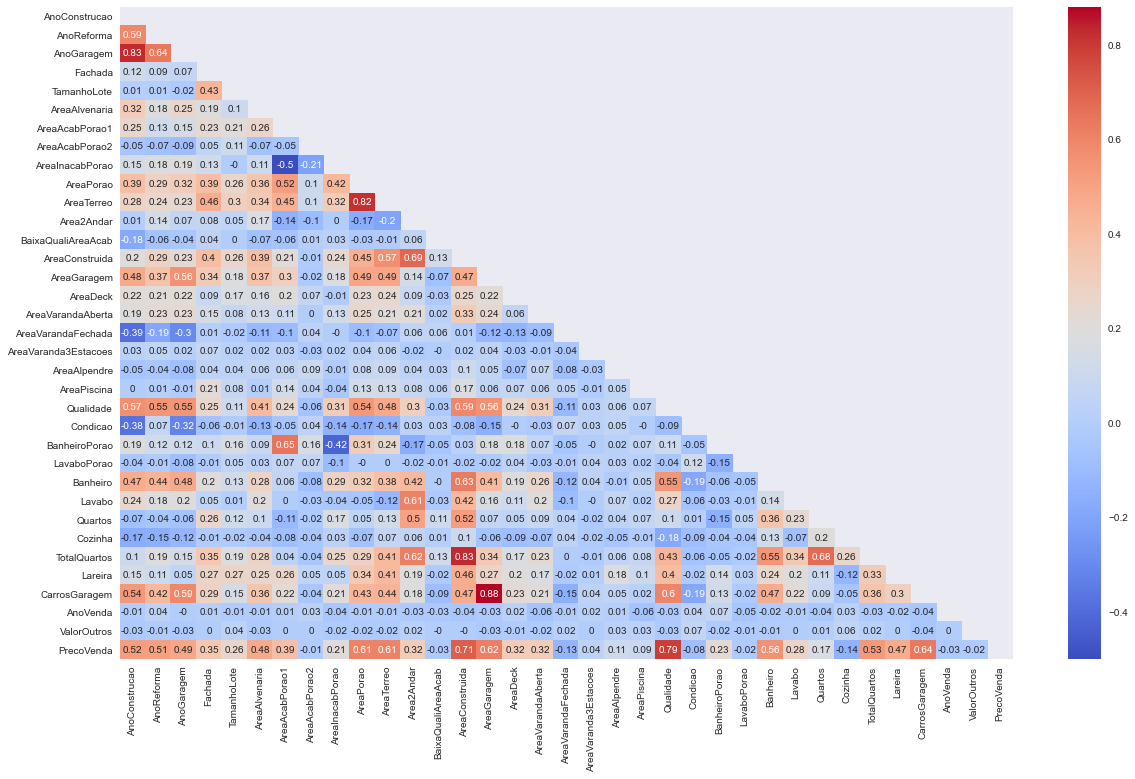

In [13]:
corr = df_raw[var_continua + var_discreta + ['PrecoVenda']].corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
plt.show()

In [14]:
corr['PrecoVenda'].sort_values(ascending=False)[1:]

Qualidade               0.79
AreaConstruida          0.71
CarrosGaragem           0.64
AreaGaragem             0.62
AreaPorao               0.61
AreaTerreo              0.61
Banheiro                0.56
TotalQuartos            0.53
AnoConstrucao           0.52
AnoReforma              0.51
AnoGaragem              0.49
AreaAlvenaria           0.48
Lareira                 0.47
AreaAcabPorao1          0.39
Fachada                 0.35
Area2Andar              0.32
AreaDeck                0.32
AreaVarandaAberta       0.32
Lavabo                  0.28
TamanhoLote             0.26
BanheiroPorao           0.23
AreaInacabPorao         0.21
Quartos                 0.17
AreaAlpendre            0.11
AreaPiscina             0.09
AreaVaranda3Estacoes    0.04
AreaAcabPorao2         -0.01
LavaboPorao            -0.02
ValorOutros            -0.02
AnoVenda               -0.03
BaixaQualiAreaAcab     -0.03
Condicao               -0.08
AreaVarandaFechada     -0.13
Cozinha                -0.14
Name: PrecoVen

In [15]:
def reg_hist_plot(dataframe, variavel_explicativa, target):
    '''
    Função para plotar um par de gráficos, que será utilizado para avaliar variáveis contínuas.
    O primeiro é um scatterplot com a linha de regressão/tendência entre a variável explicativa e o target selecionado.
    O segundo é um histograma com a distribuição da variável explicativa.
    '''
    
    fig, eixo = plt.subplots(1,2,figsize=(20,5)) 

    sns.regplot(data = dataframe, ax=eixo[0], x = variavel_explicativa, y = target)
    eixo[0].set_title('{} vs {}'.format(variavel_explicativa, target))
    
    sns.histplot(data = dataframe, ax=eixo[1], x=variavel_explicativa, kde=True)
    eixo[1].set_ylabel('Contagem')
    eixo[1].set_title('Distribuição da varável explicativa {}'.format(variavel_explicativa))
    
    plt.tight_layout()
    plt.show()
    
def box_hist_plot(dataframe, variavel_explicativa, target):
    '''
    Função para plotar um par de gráficos, que será usado para avaliar variáveis discretas.
    O primeiro é um boxplot entre a variável explicativa e o target selecionado.
    O segundo é um histograma com a distribuição da variável explicativa.
    '''
    
    fig, eixo = plt.subplots(1,2,figsize=(20,5)) 

    sns.boxplot(data = dataframe, ax=eixo[0], x = variavel_explicativa, y = target)
    eixo[0].set_title('{} vs {}'.format(variavel_explicativa, target))
    
    sns.histplot(data = dataframe, ax=eixo[1], x=variavel_explicativa, kde=True)
    eixo[1].set_ylabel('Contagem')
    eixo[1].set_title('Distribuição da varável explicativa {}'.format(variavel_explicativa))
    
    plt.tight_layout()
    plt.show()   

def box_count_plot(dataframe, variavel_explicativa, target):
    '''
    Função para plotar um par de gráficos, que será usado para avaliar variáveis nominais e ordinais.
    O primeiro é um boxplot entre a variável explicativa e o target selecionado.
    O segundo é um countplot da variável explicativa.
    '''
    
    fig, eixo = plt.subplots(1,2,figsize=(20,5)) 

    sns.boxplot(data = dataframe, ax=eixo[0], x = variavel_explicativa, y = target)
    eixo[0].set_title('{} vs {}'.format(variavel_explicativa, target))
    
    sns.countplot(data = dataframe, ax=eixo[1], x=variavel_explicativa)
    eixo[1].set_ylabel('Contagem')
    eixo[1].set_title('Distribuição da varável explicativa {}'.format(variavel_explicativa))
    
    plt.tight_layout()
    plt.show()

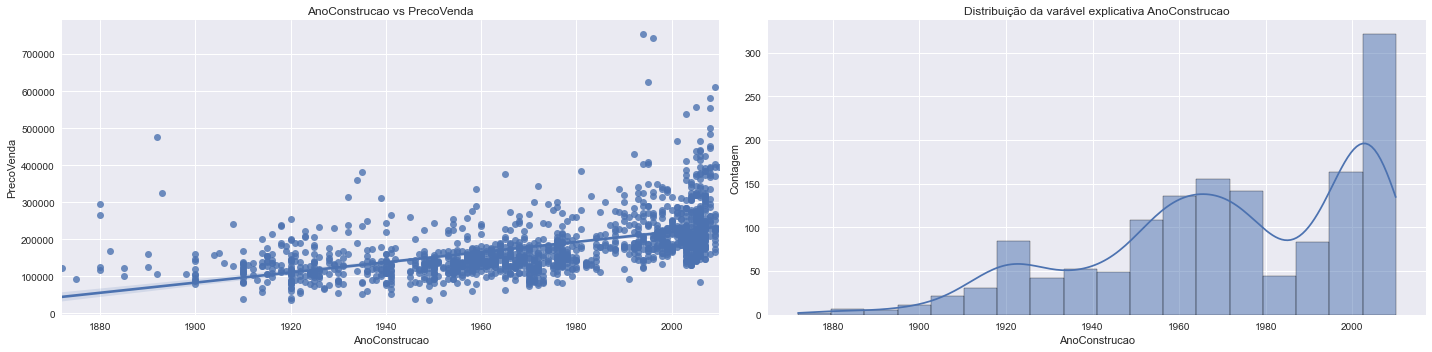

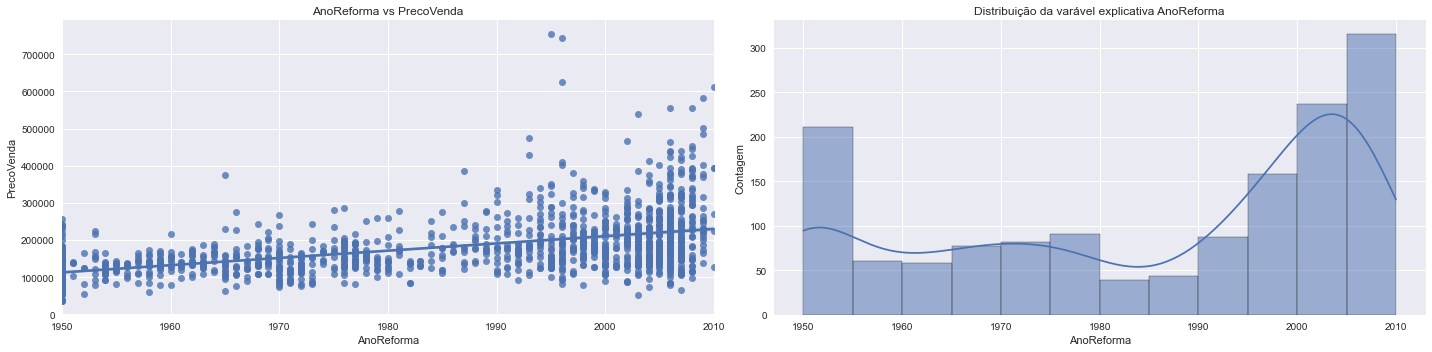

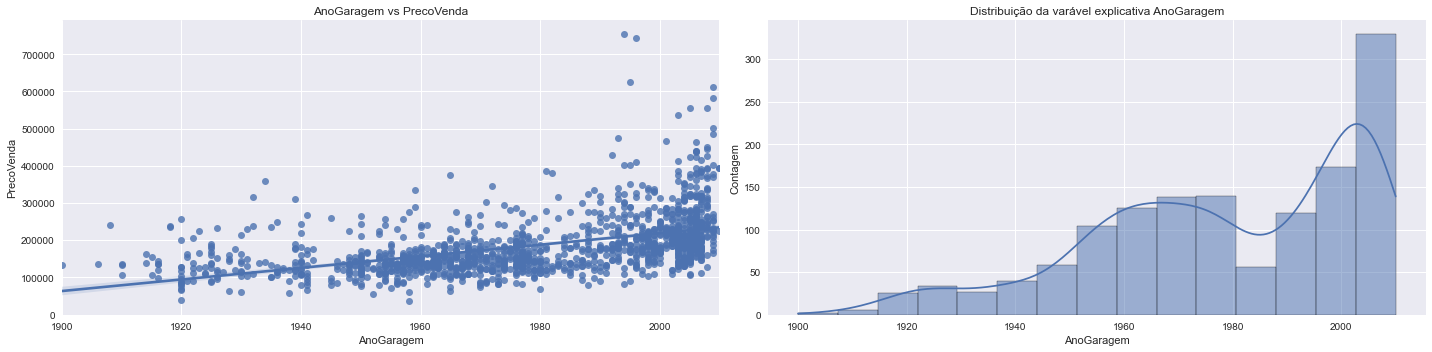

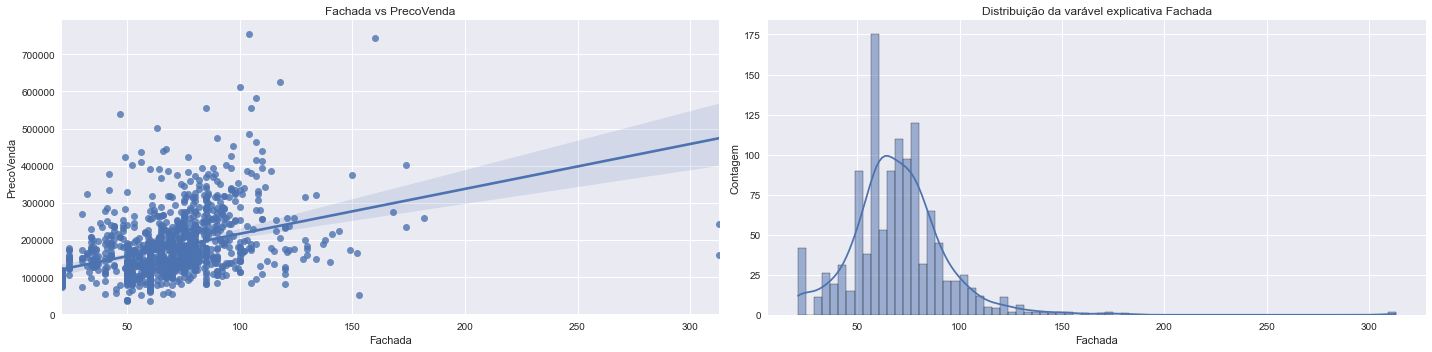

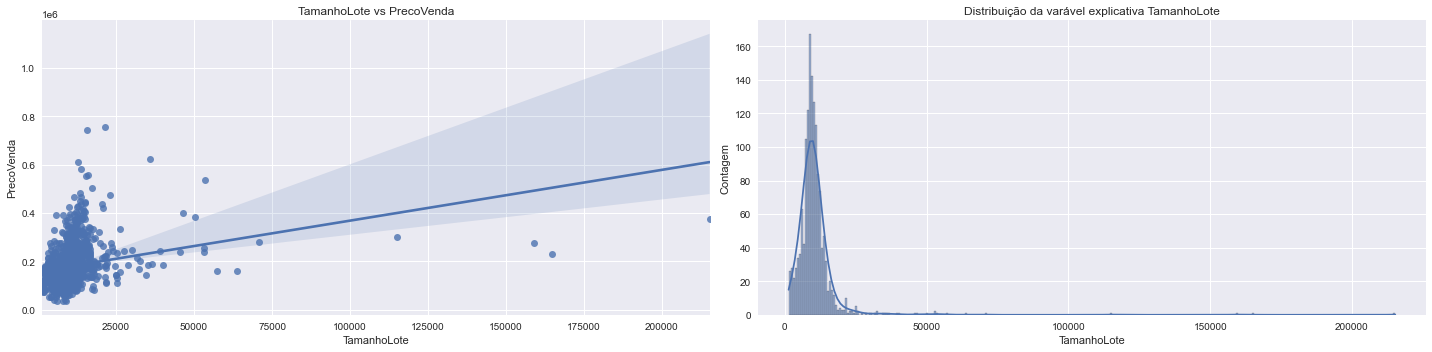

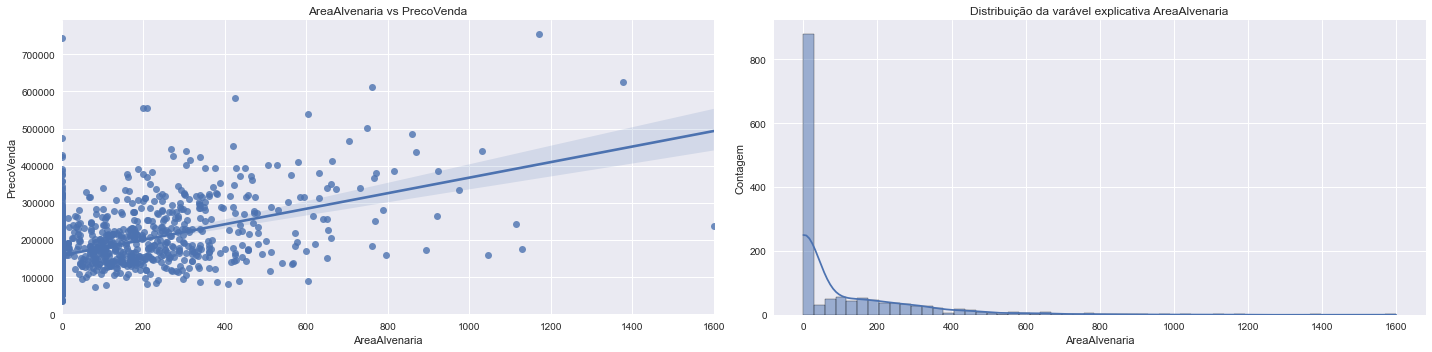

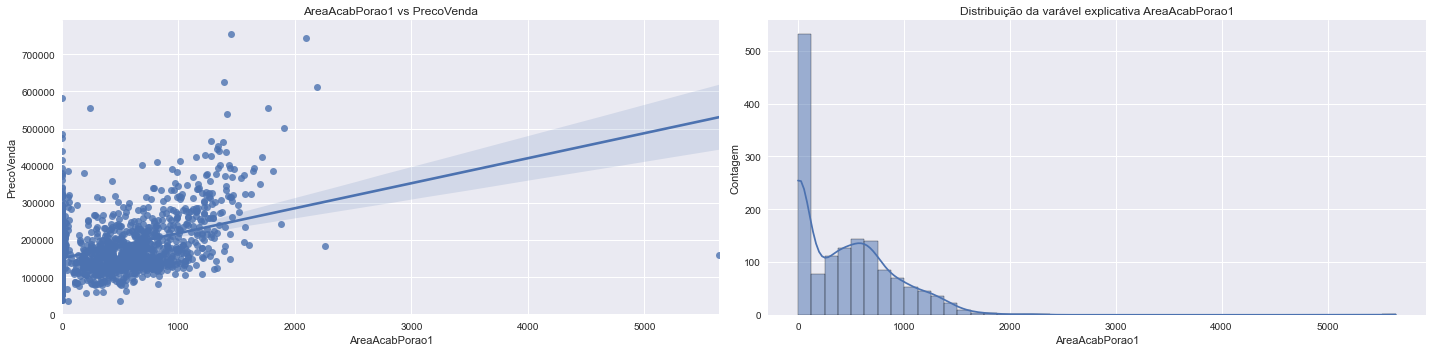

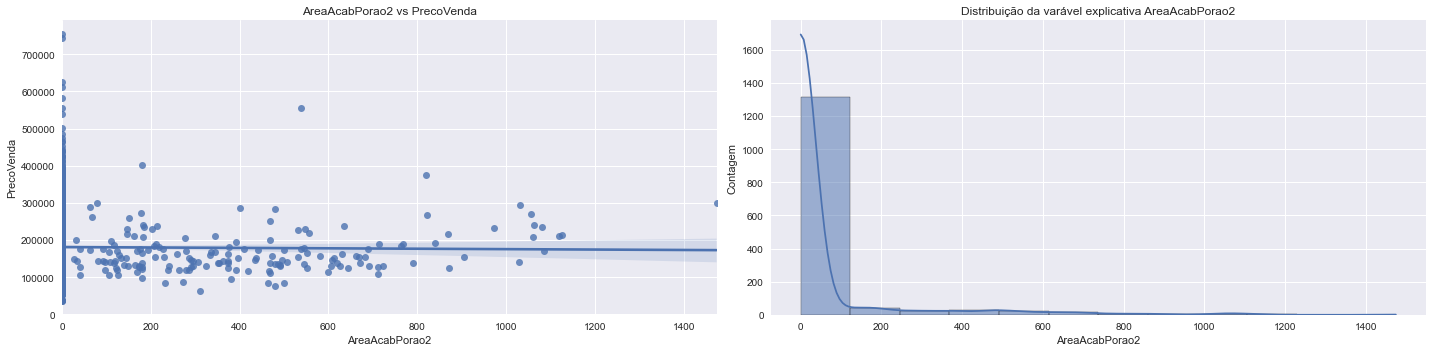

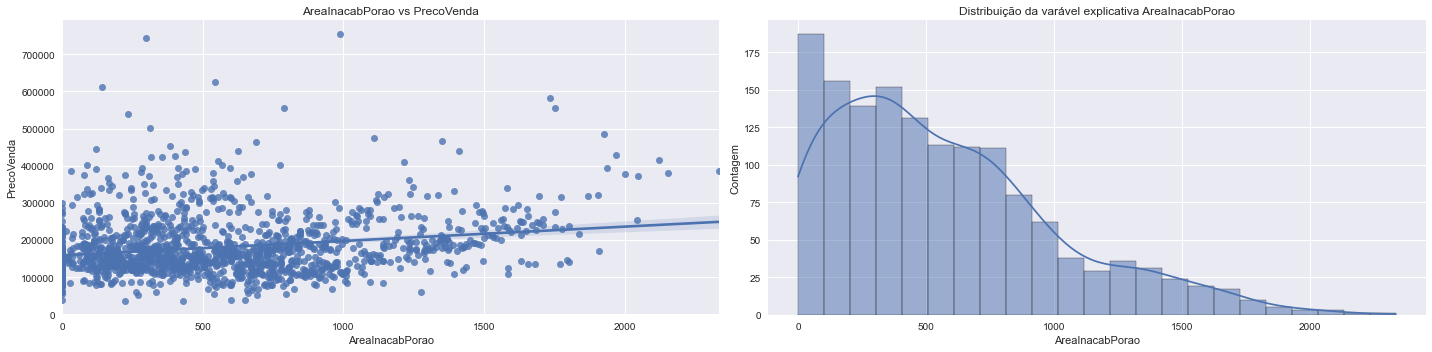

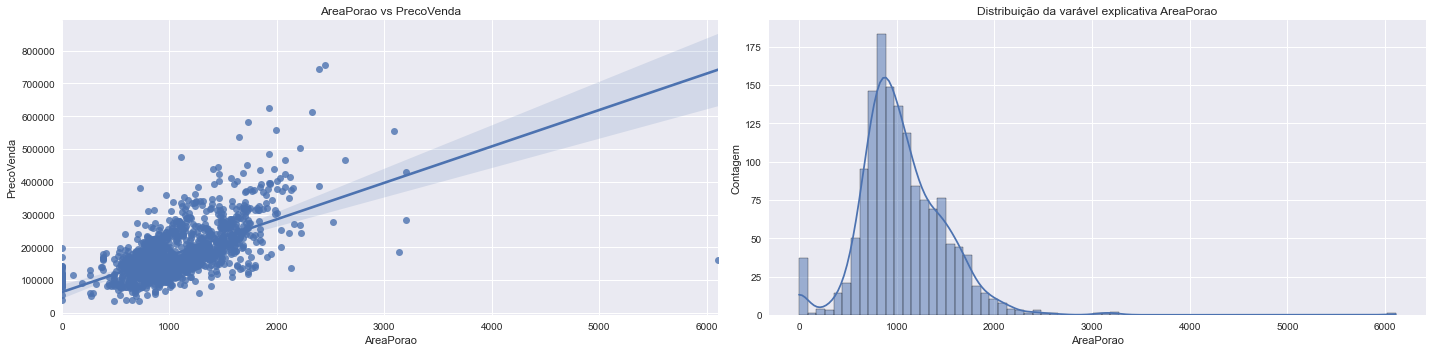

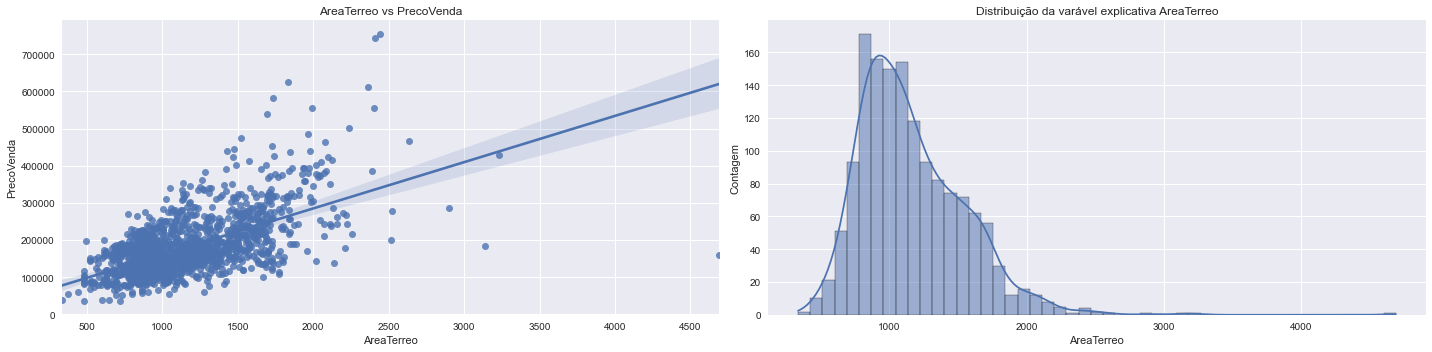

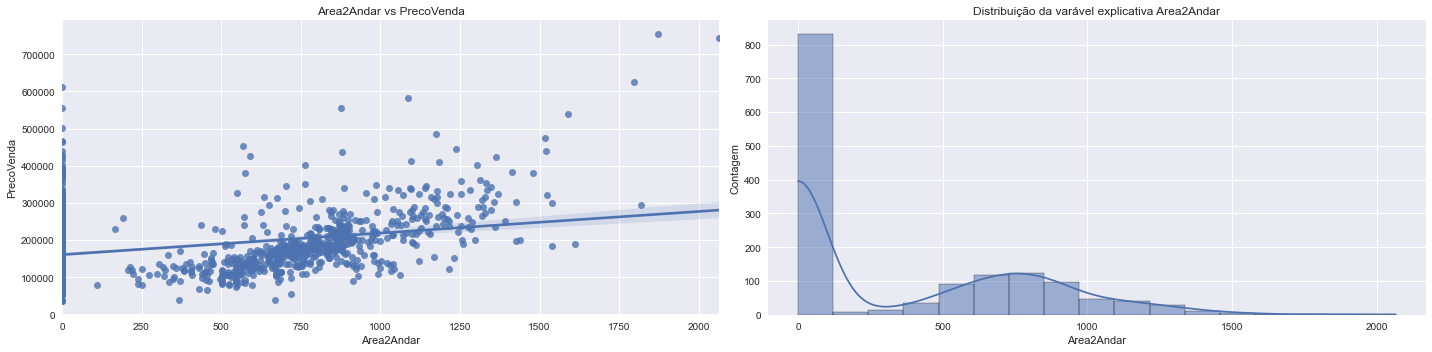

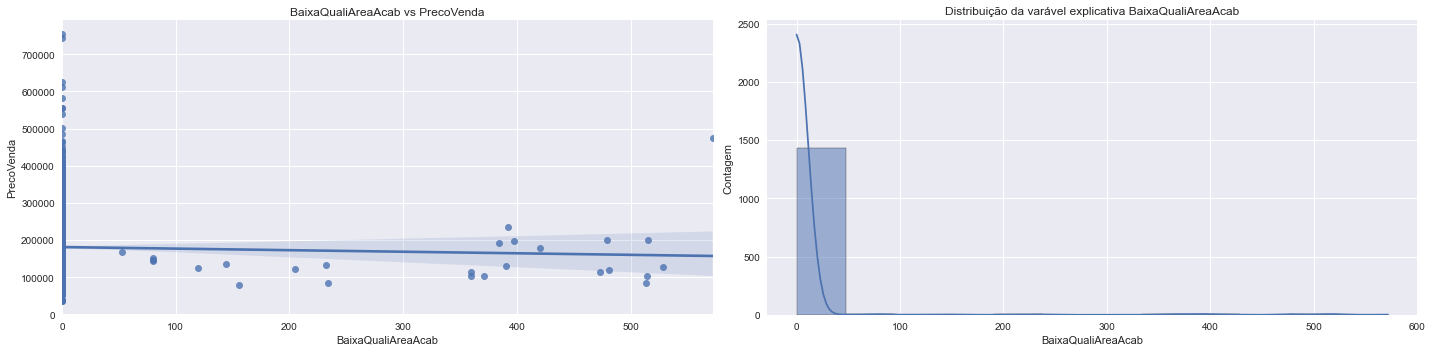

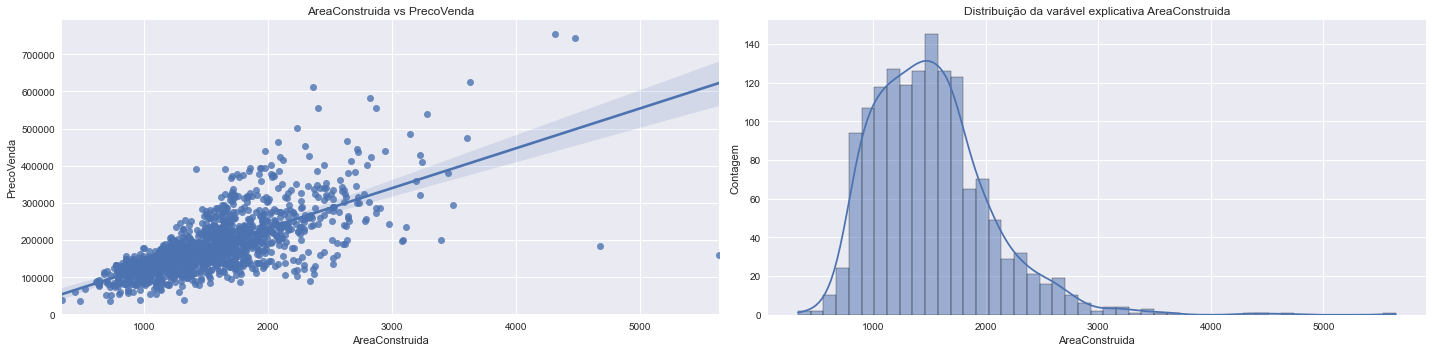

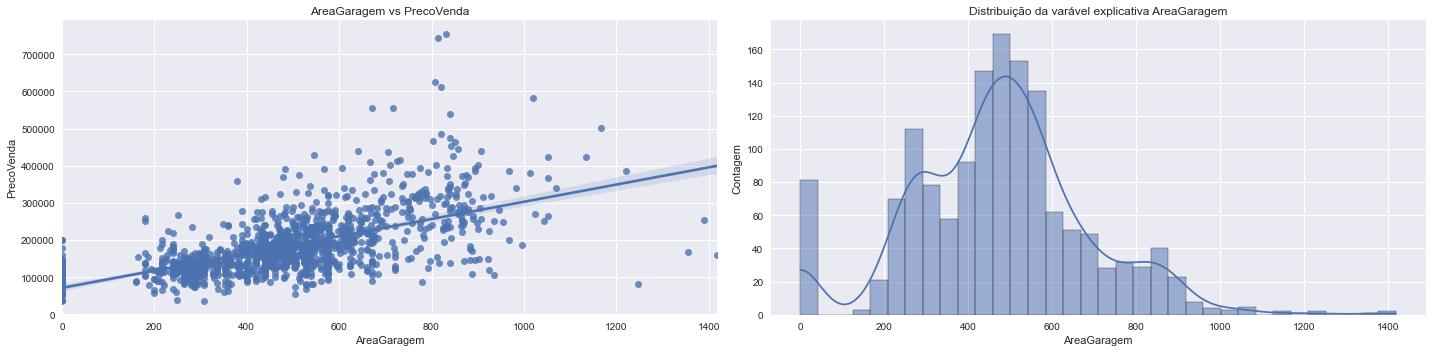

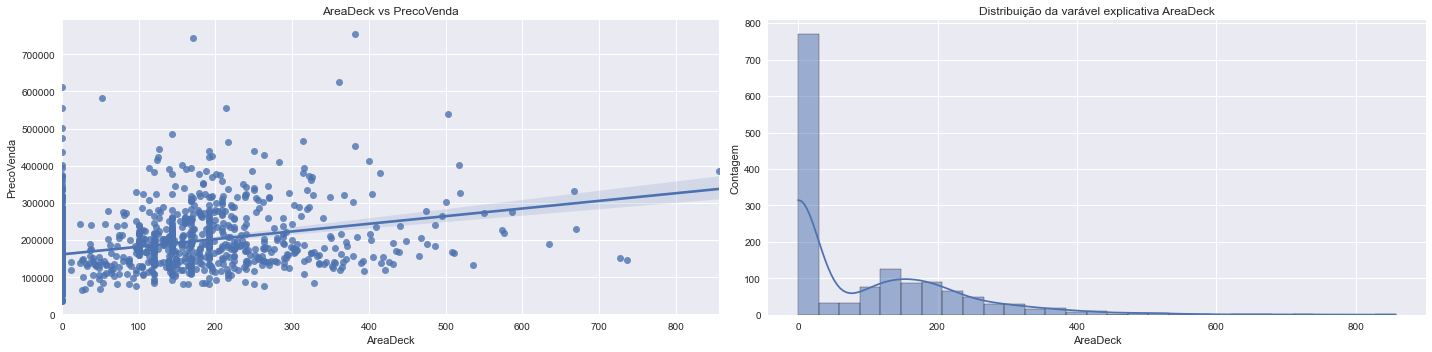

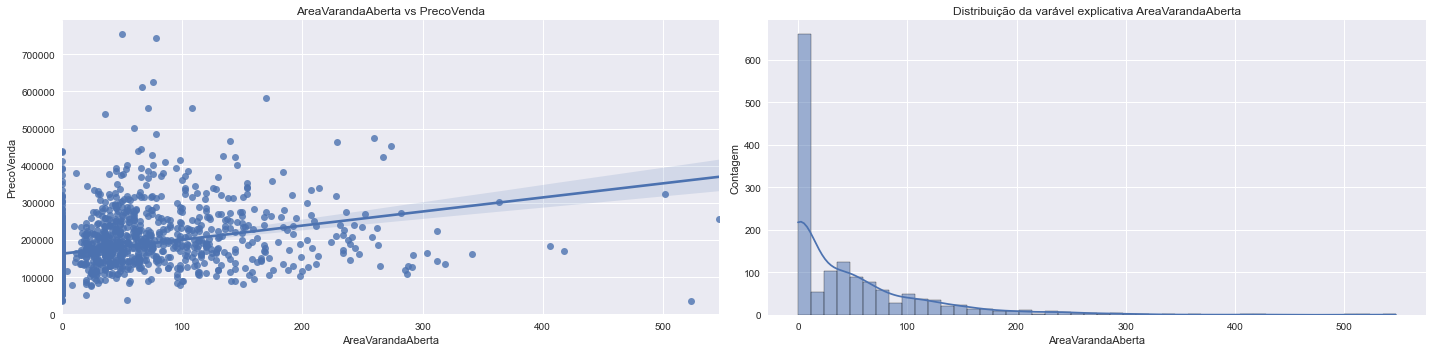

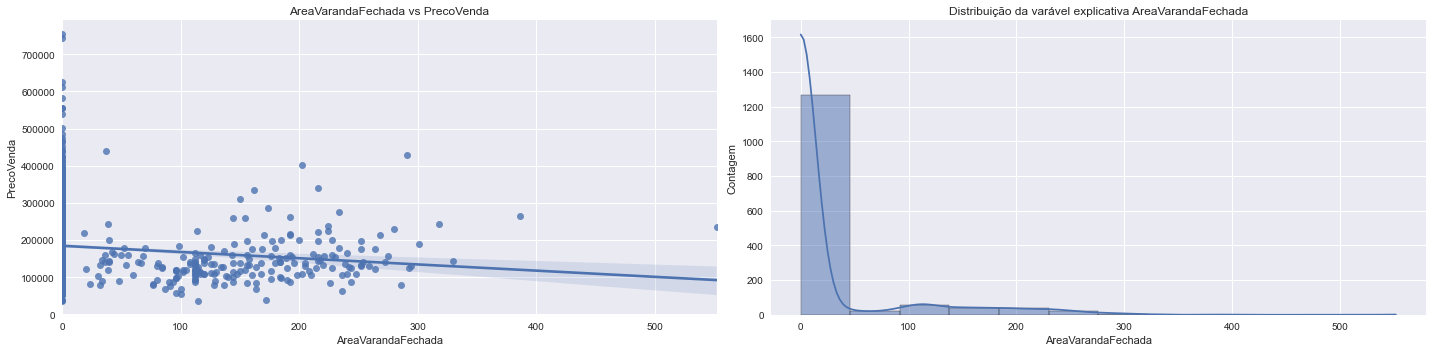

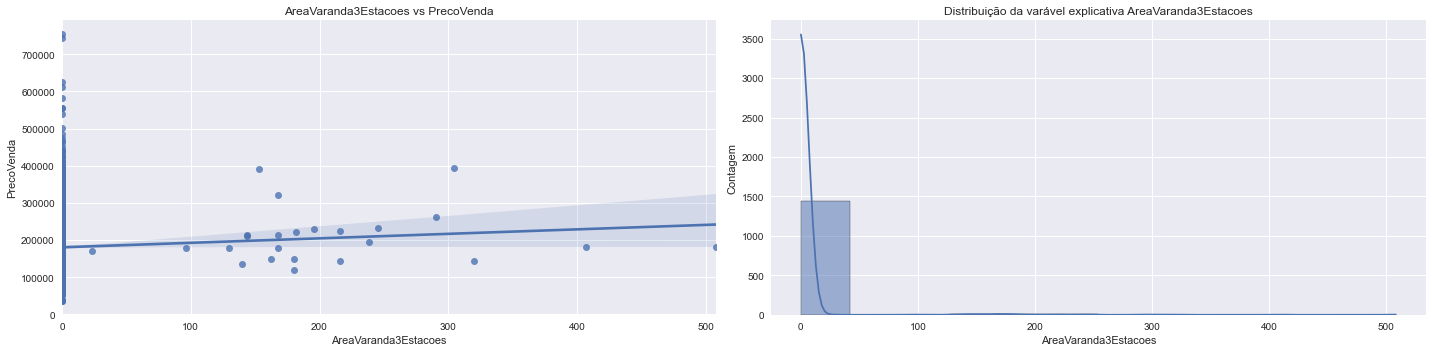

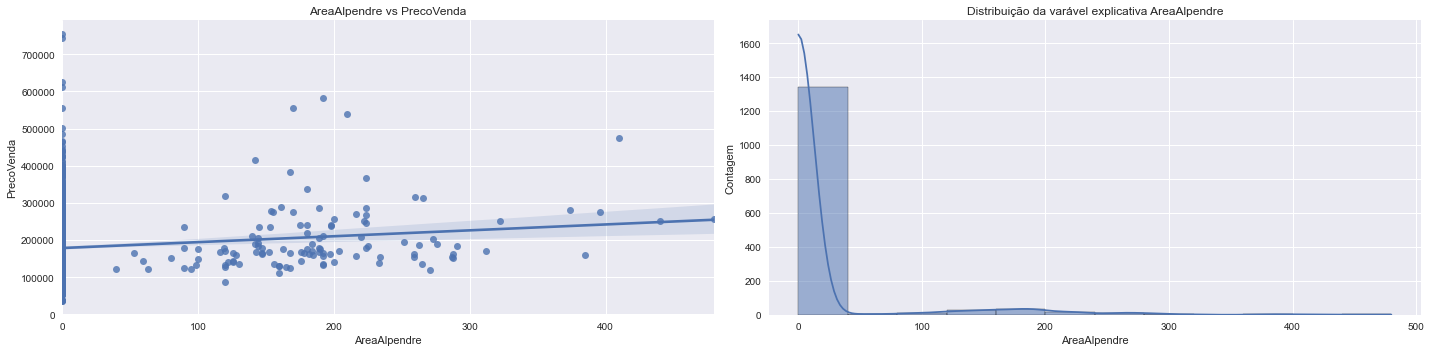

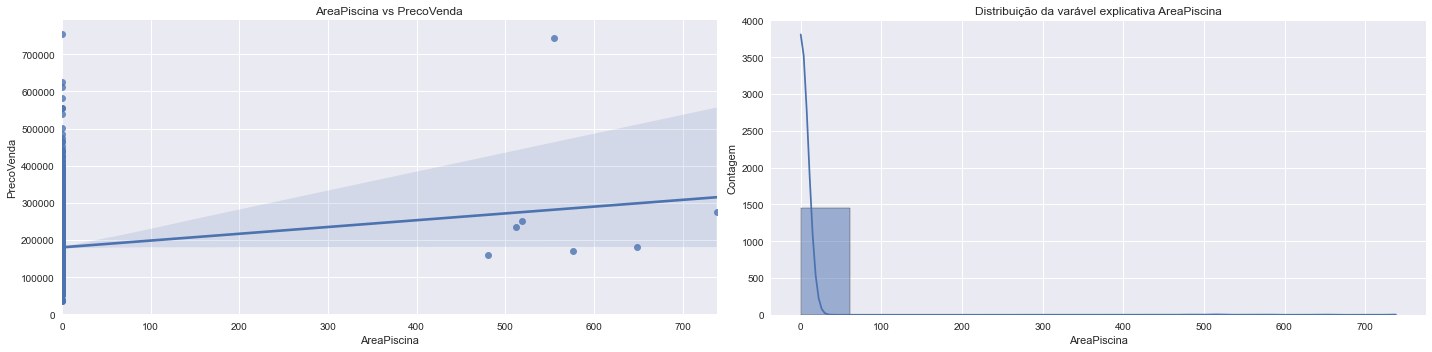

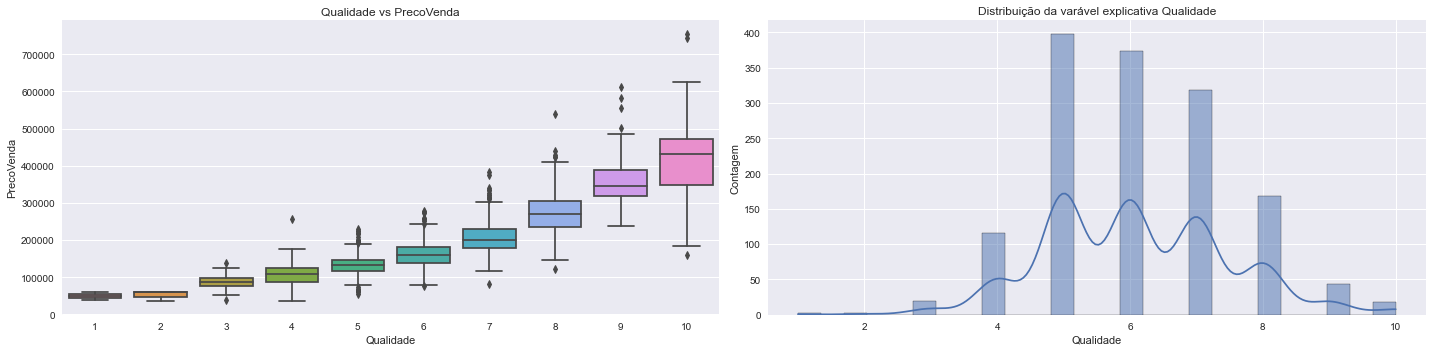

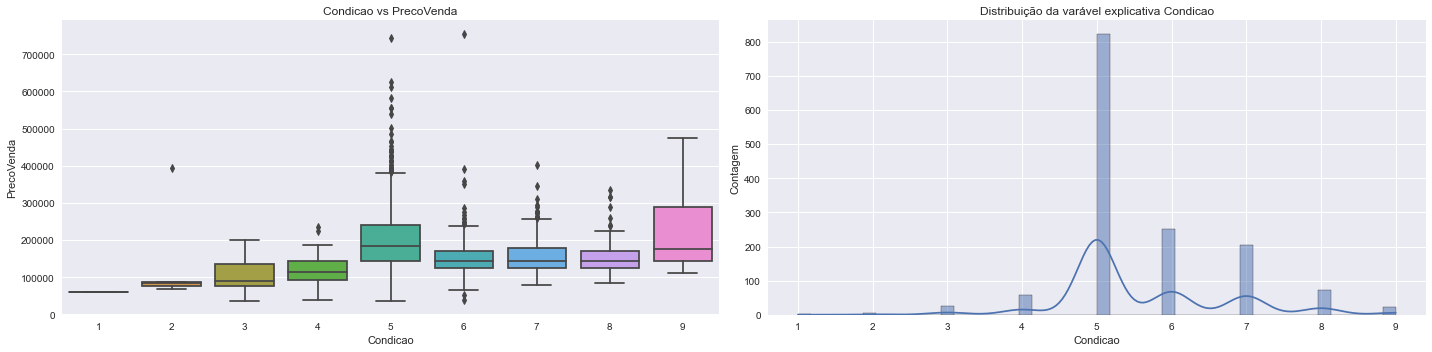

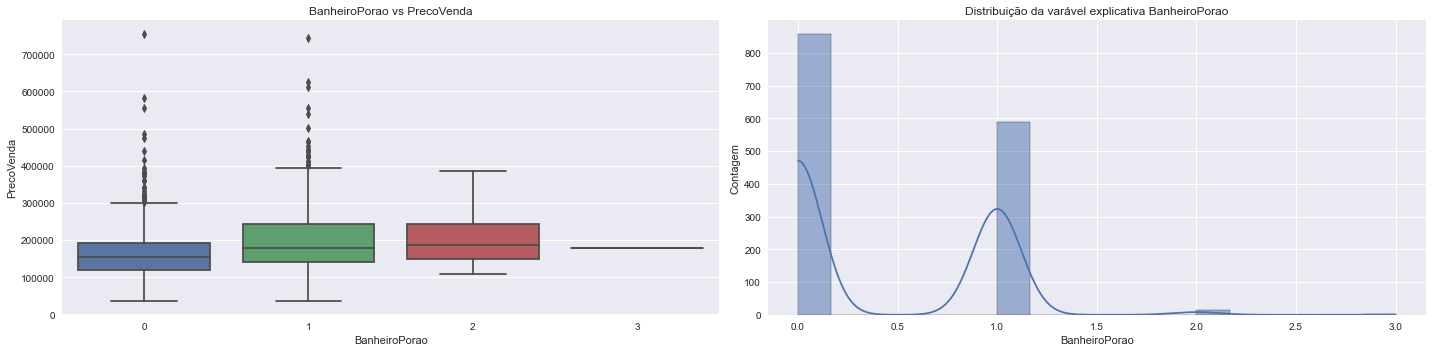

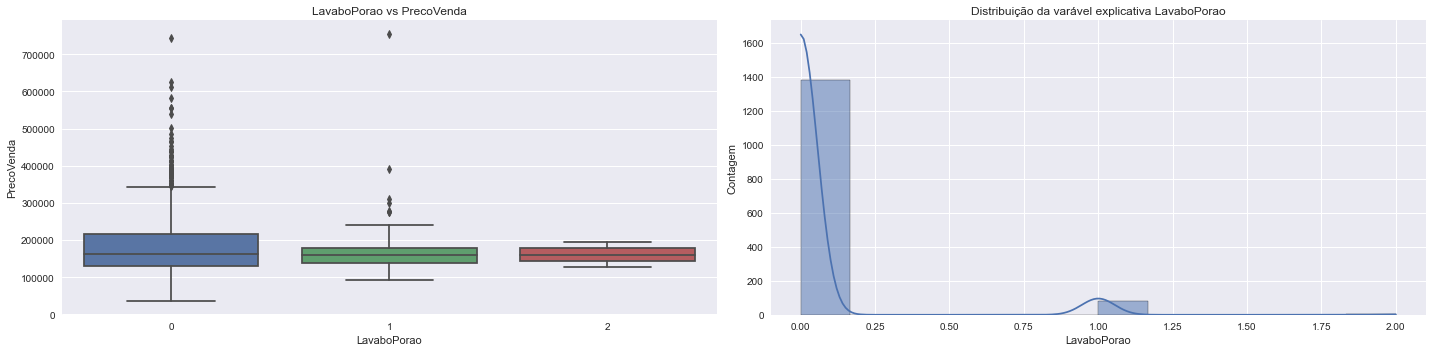

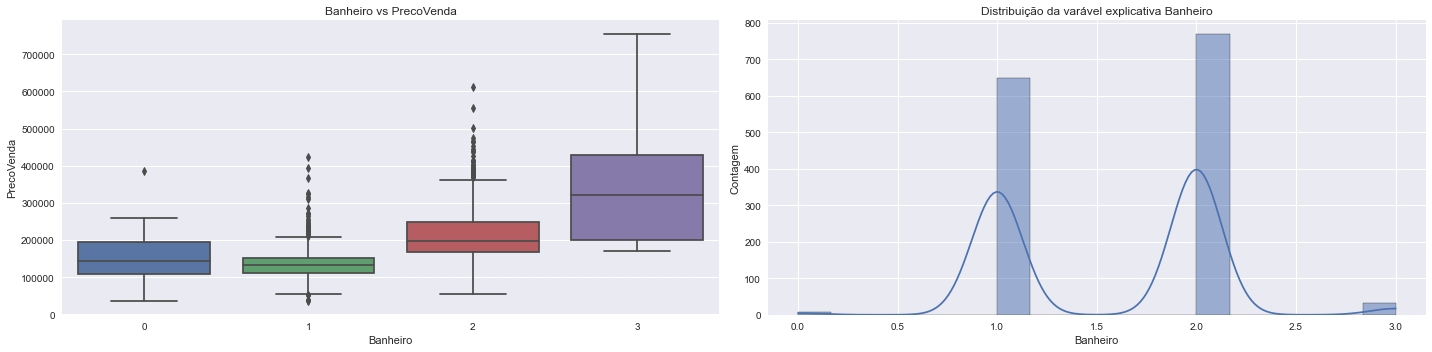

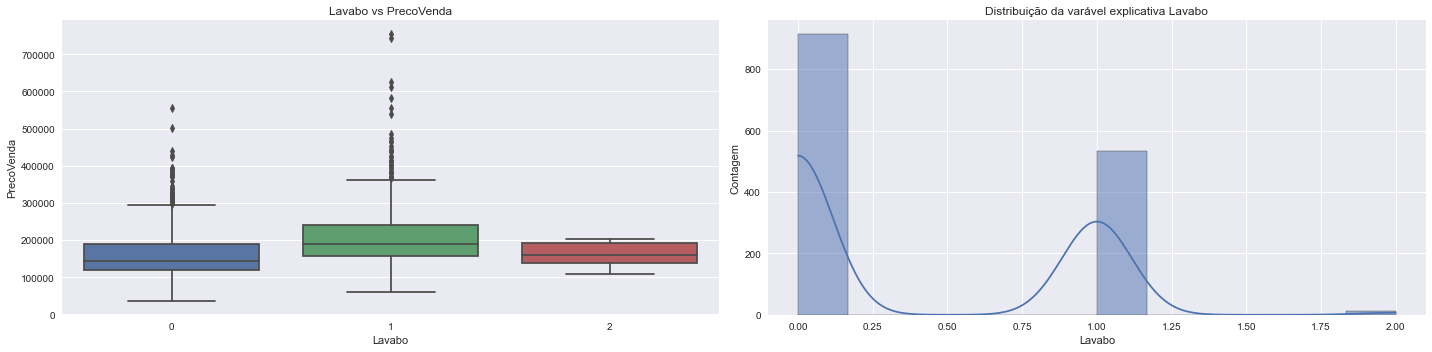

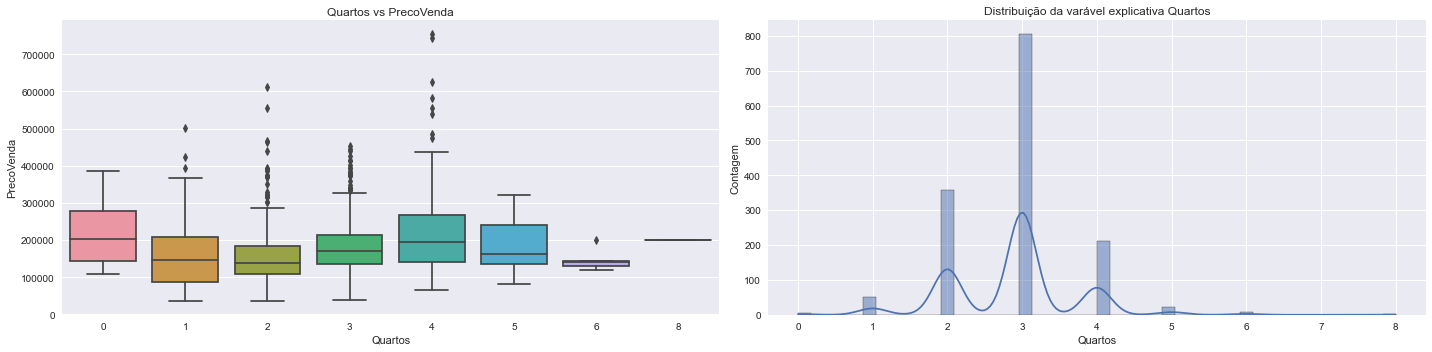

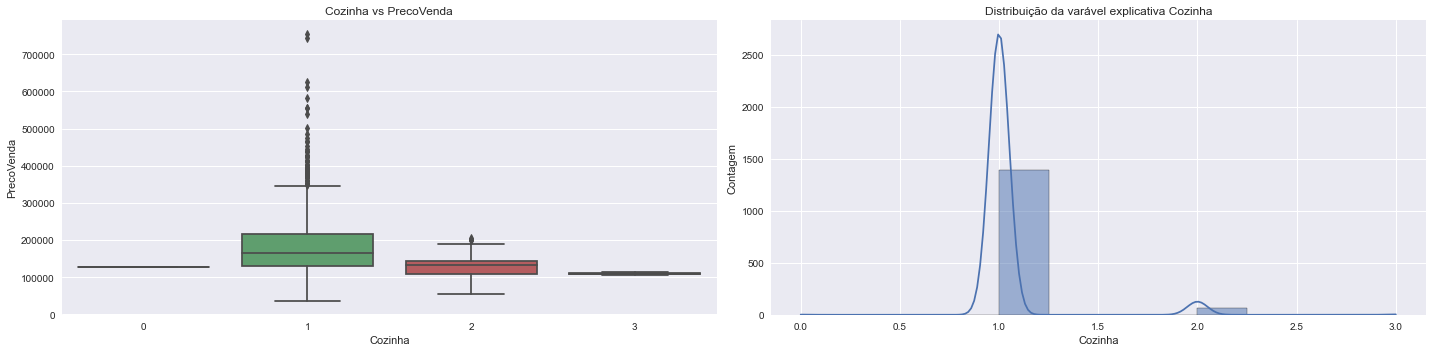

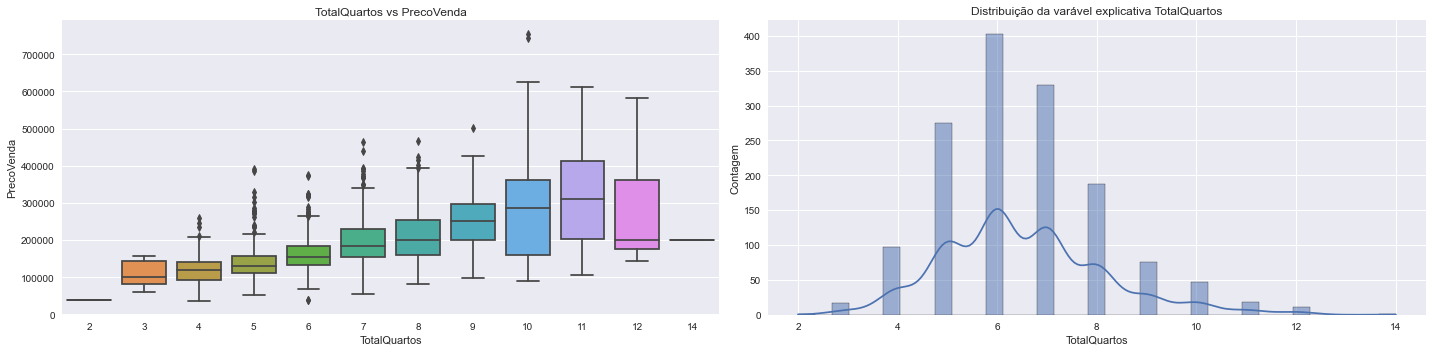

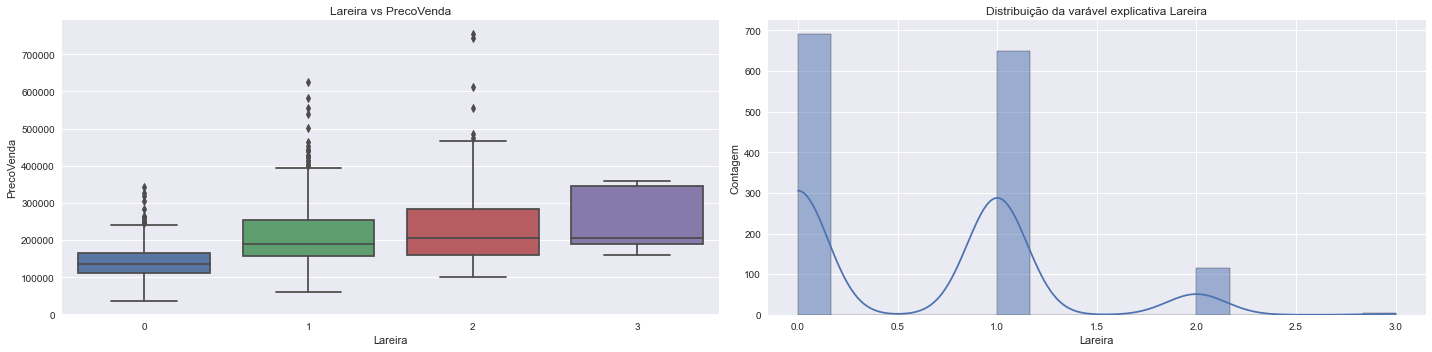

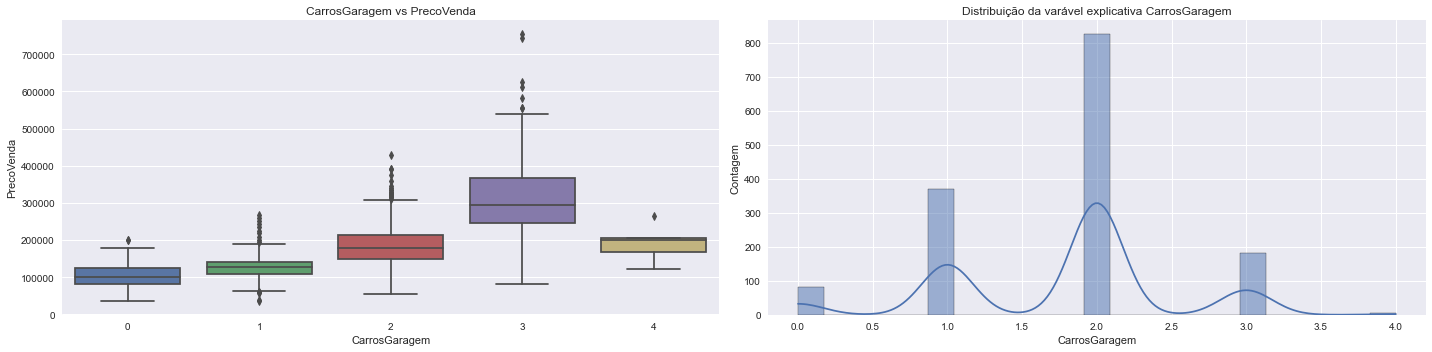

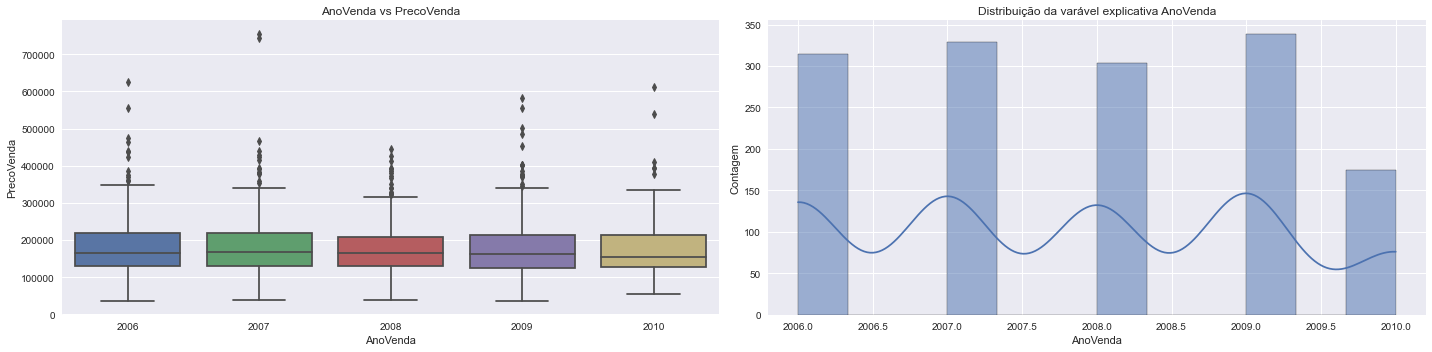

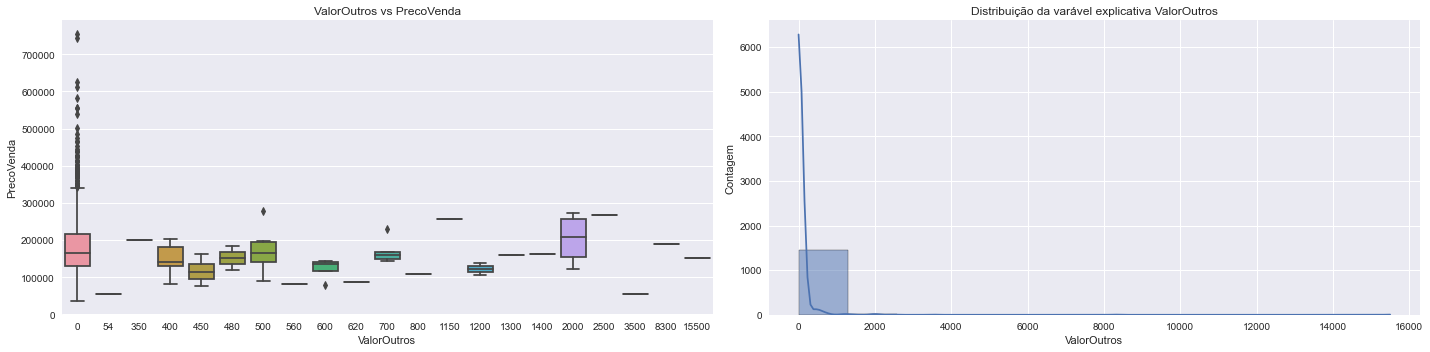

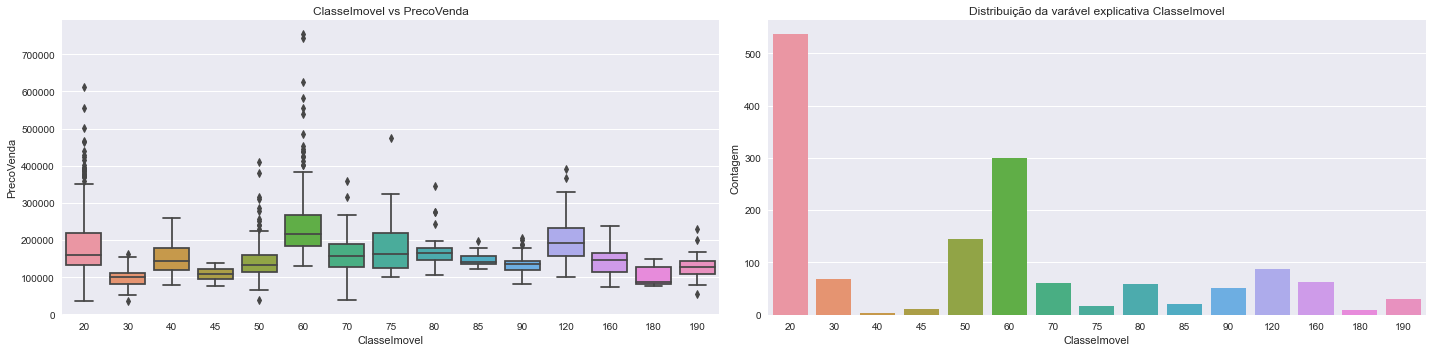

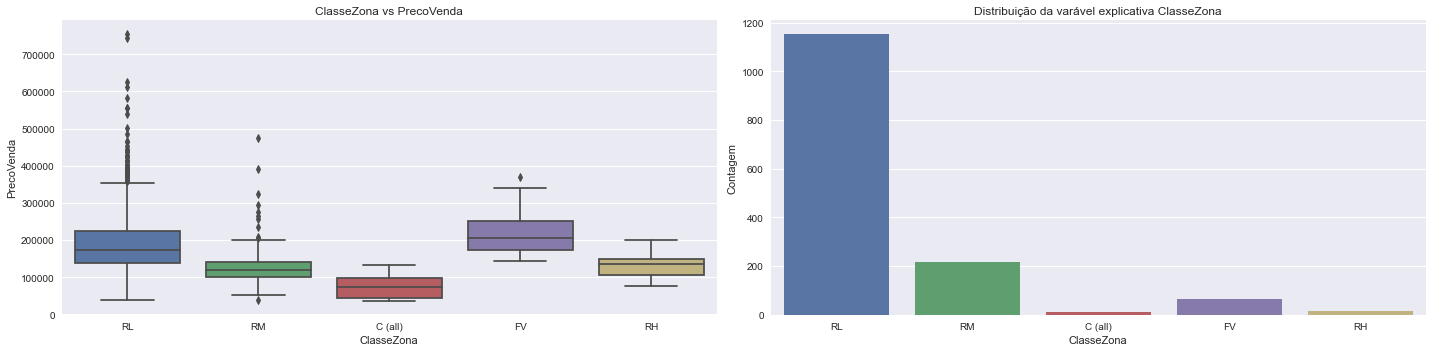

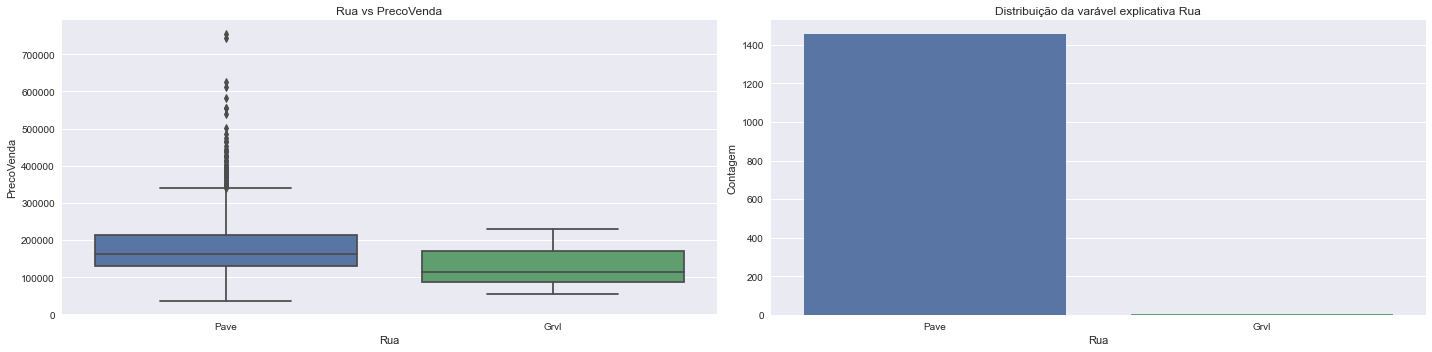

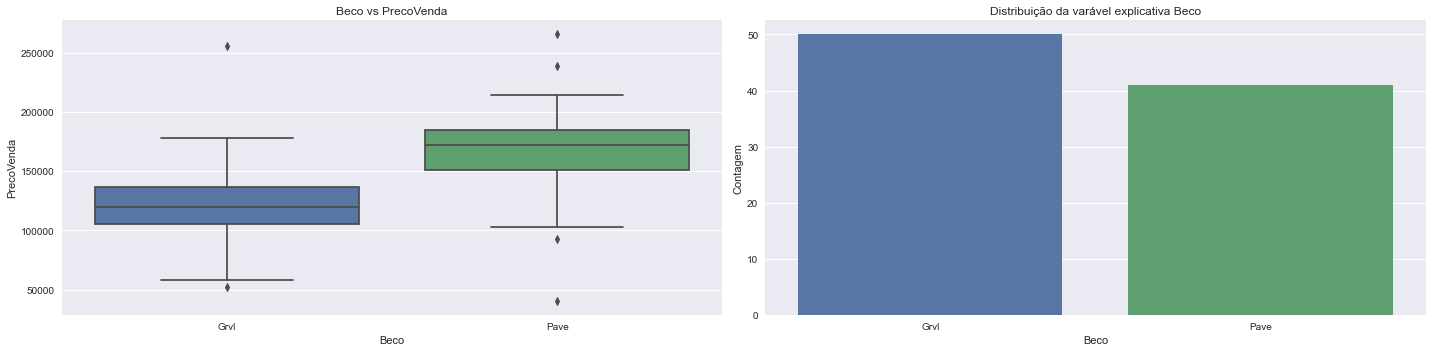

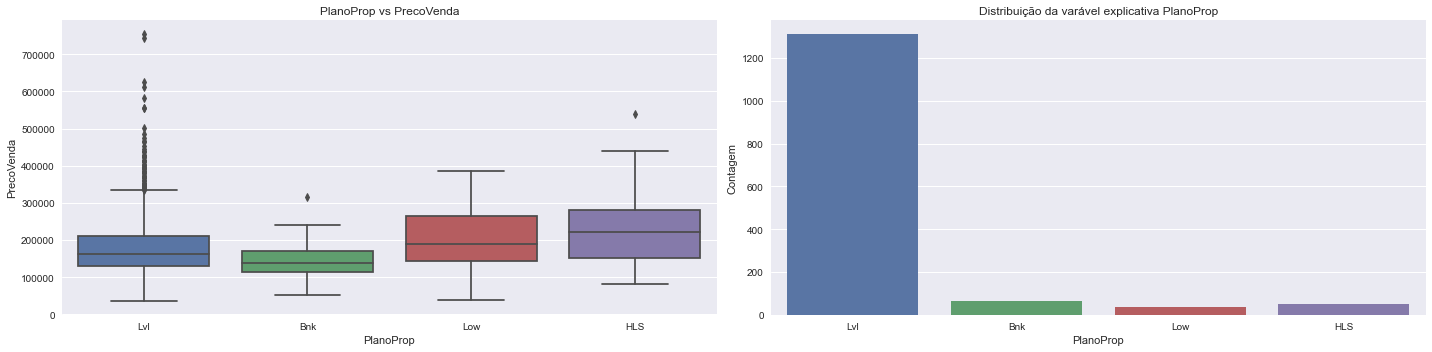

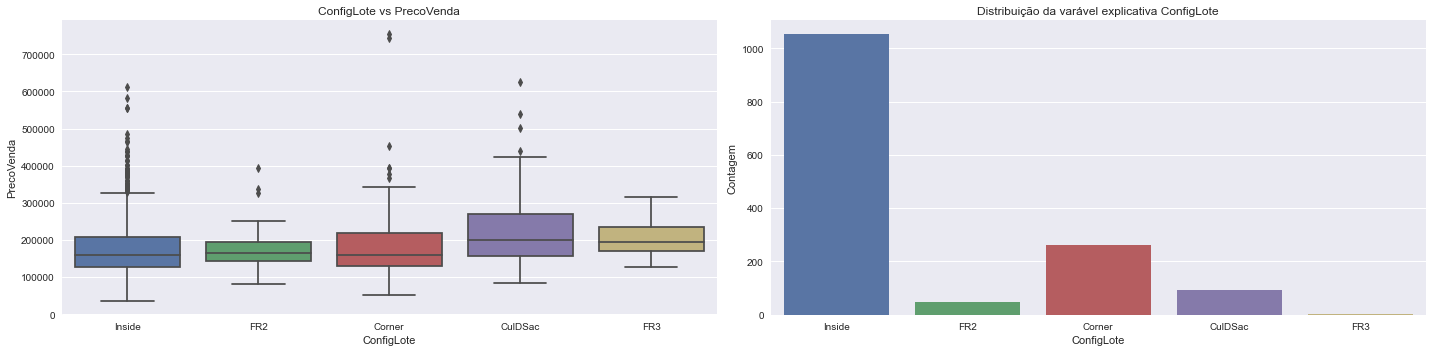

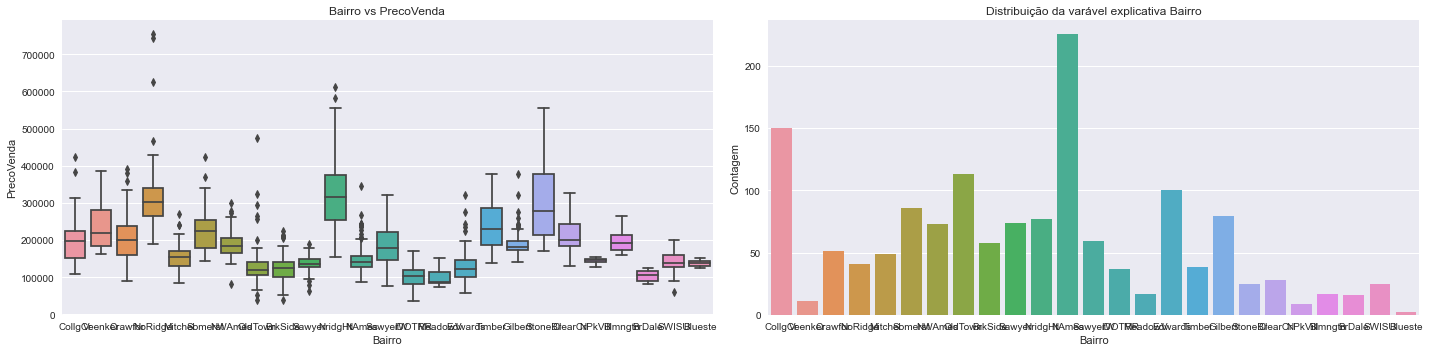

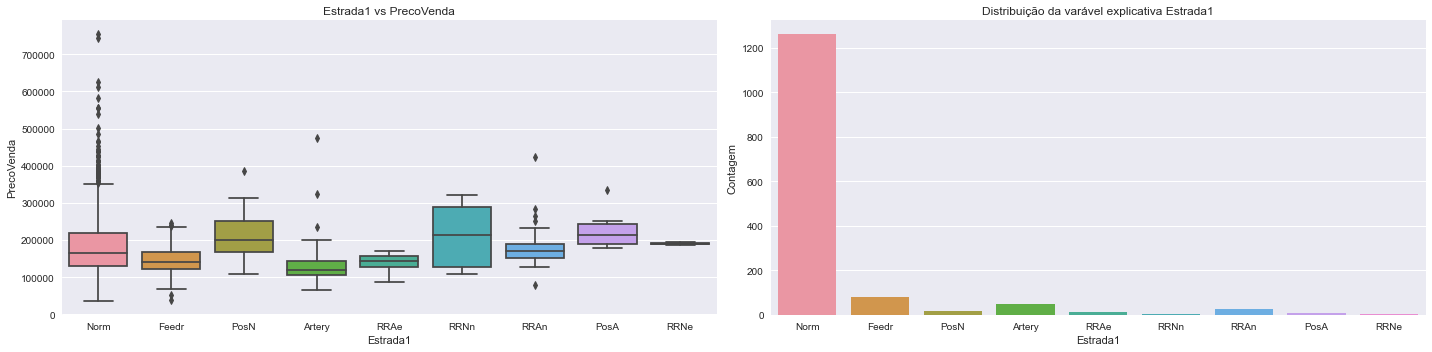

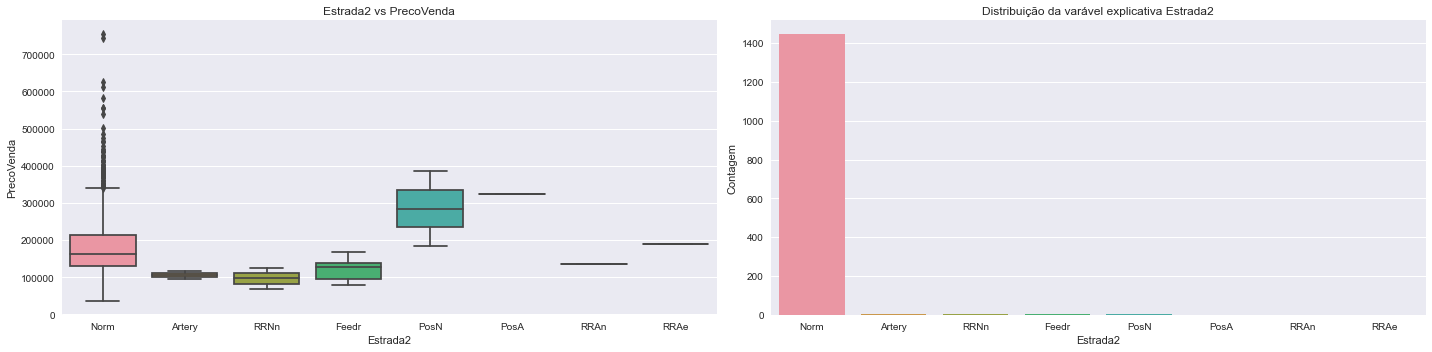

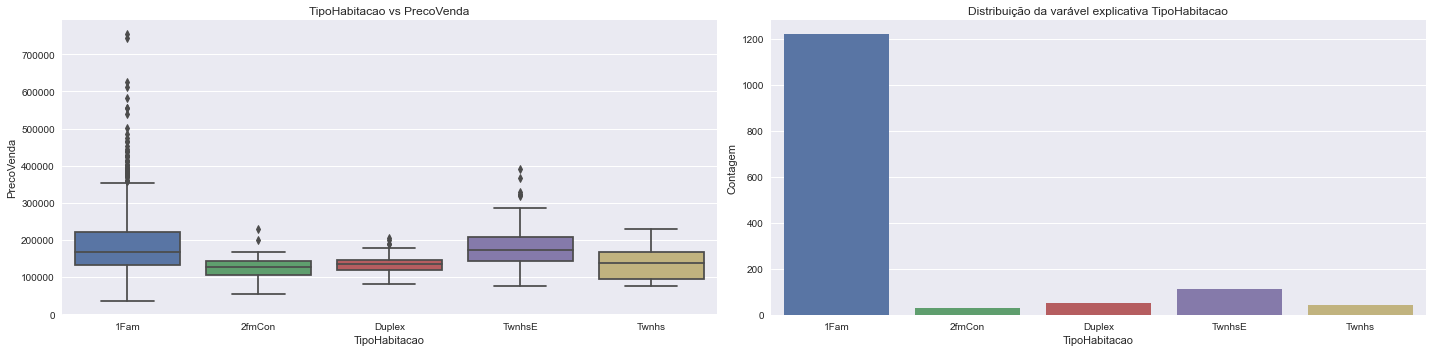

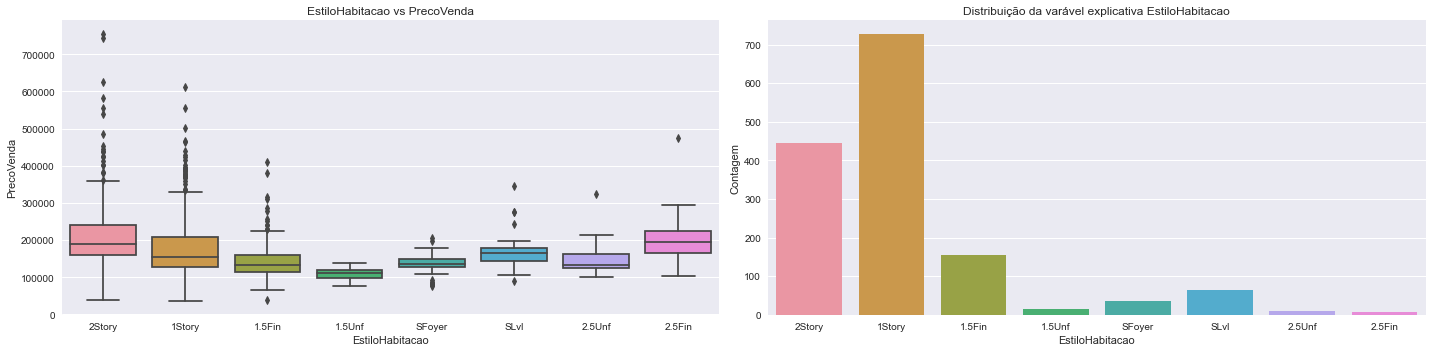

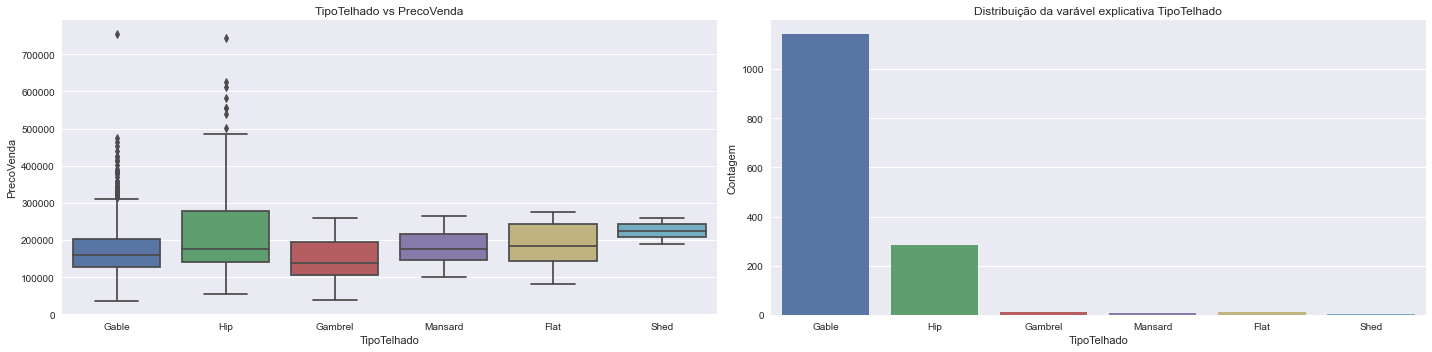

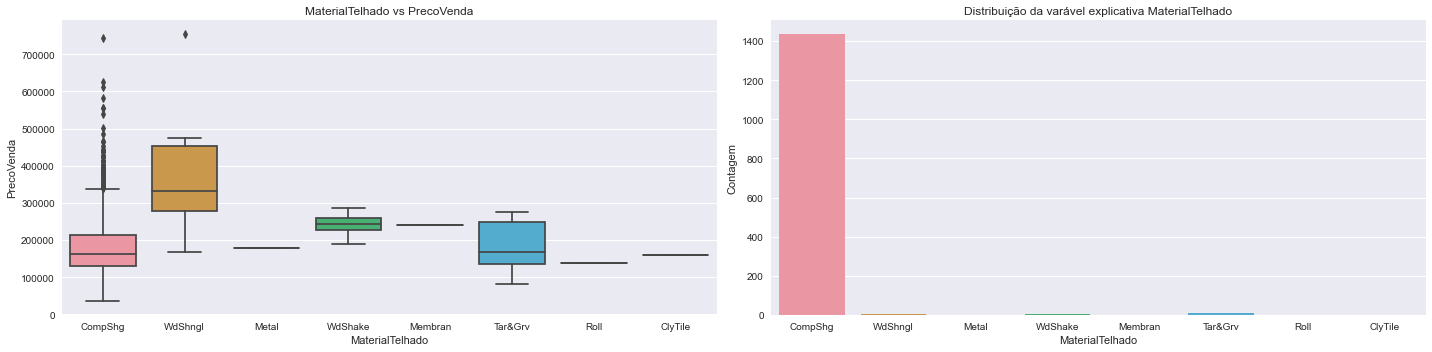

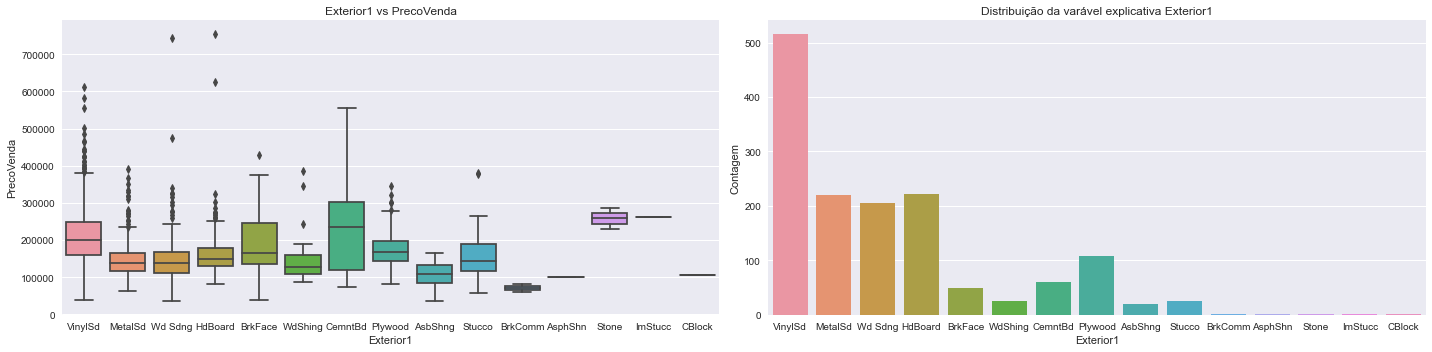

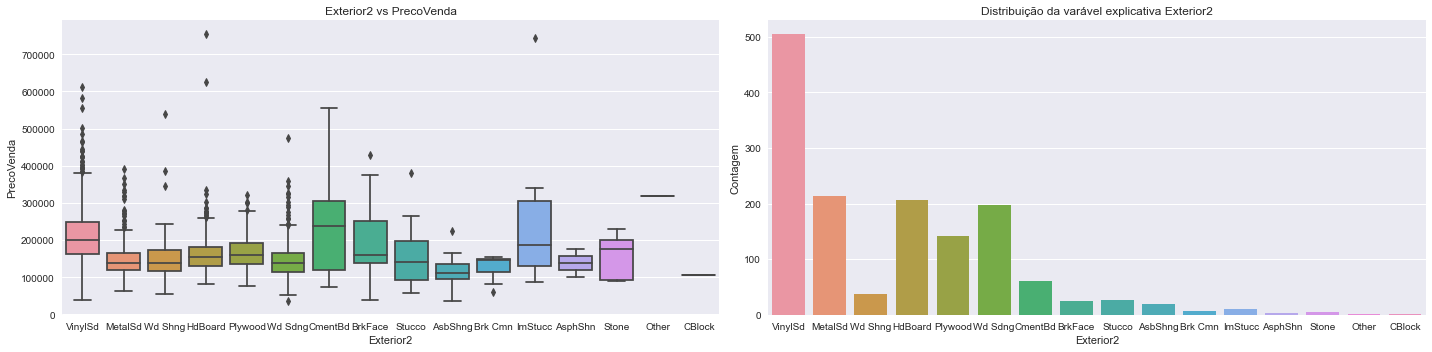

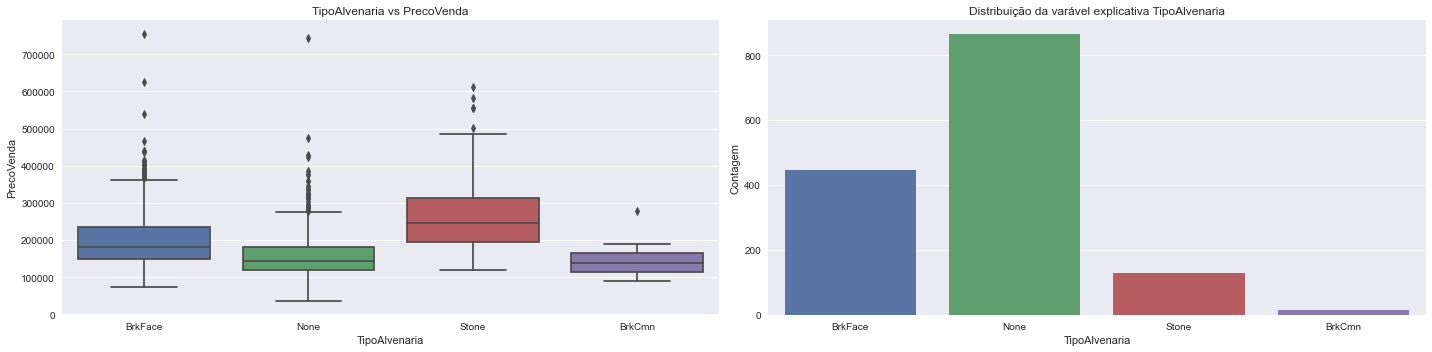

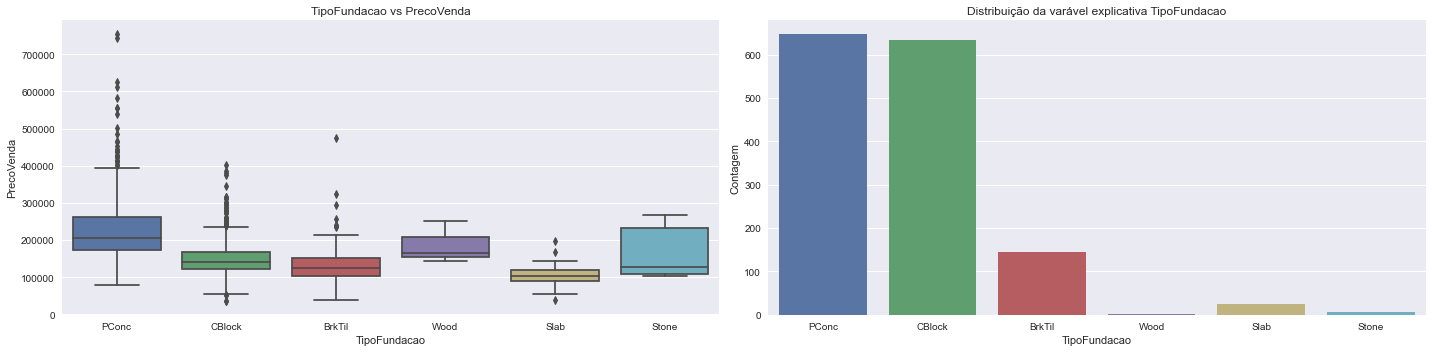

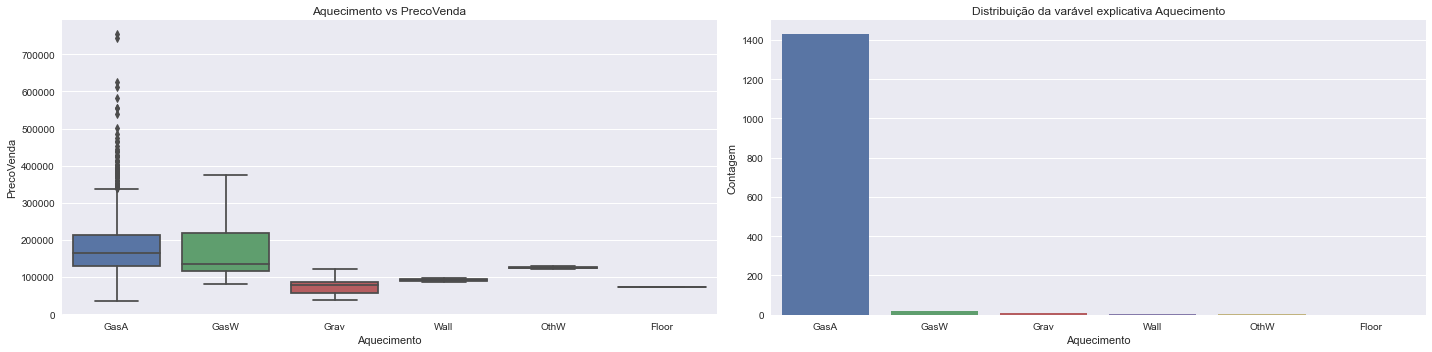

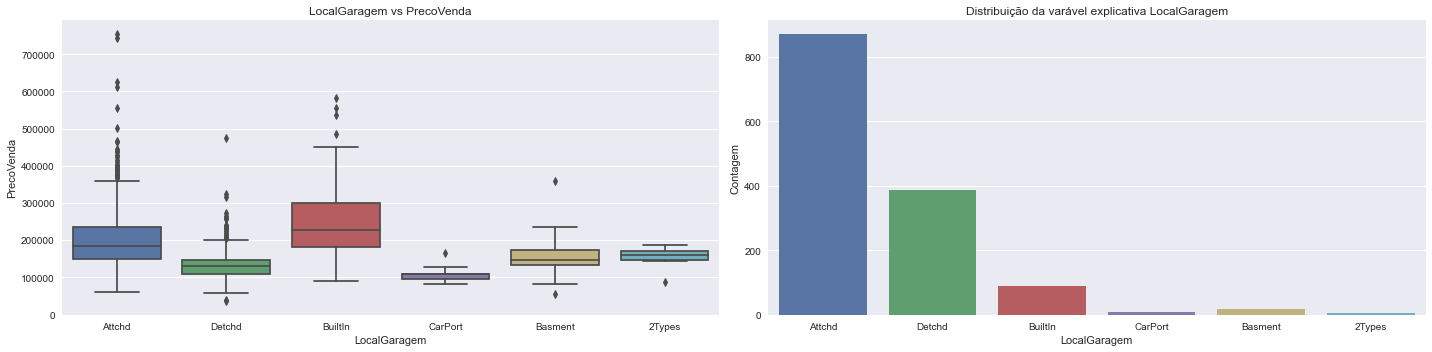

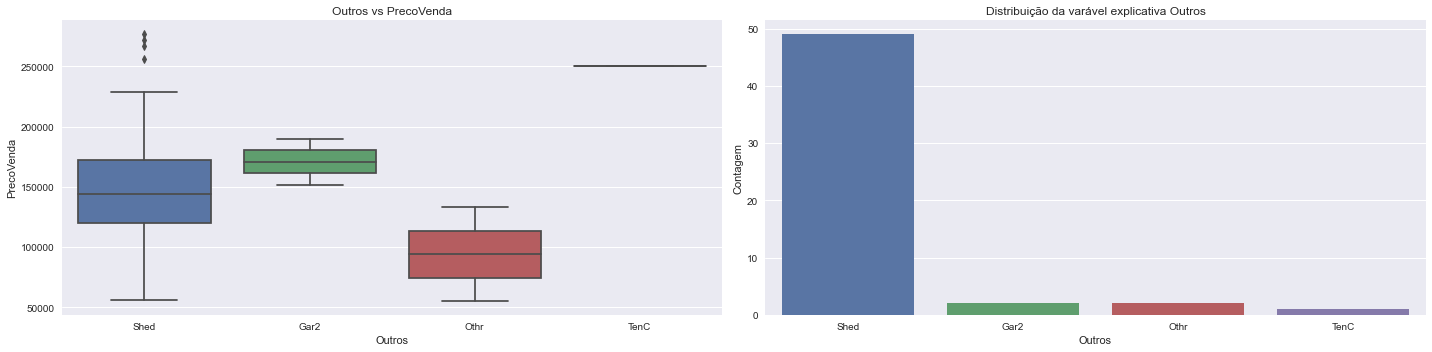

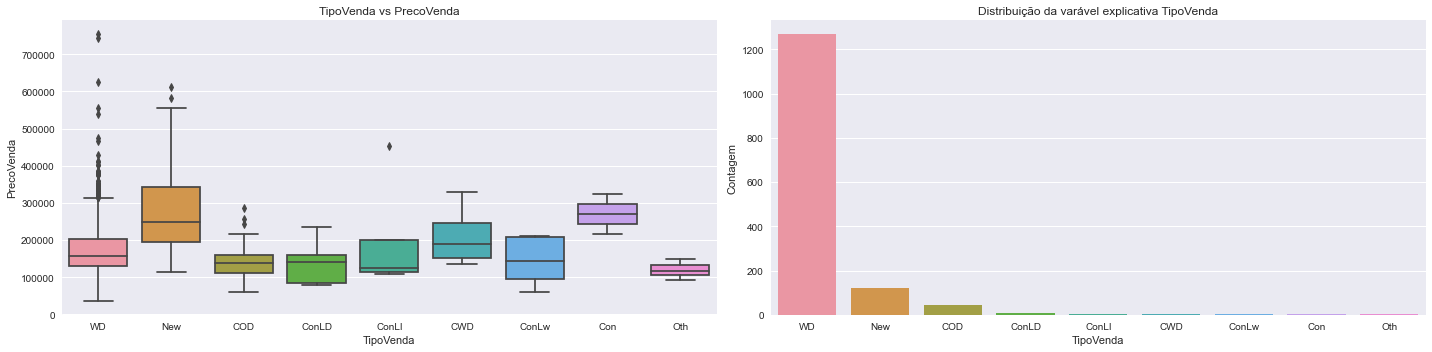

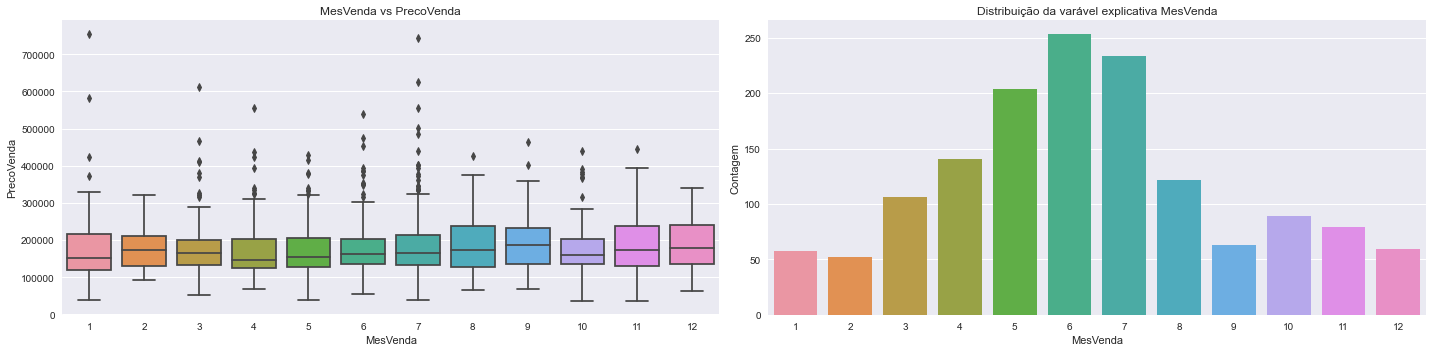

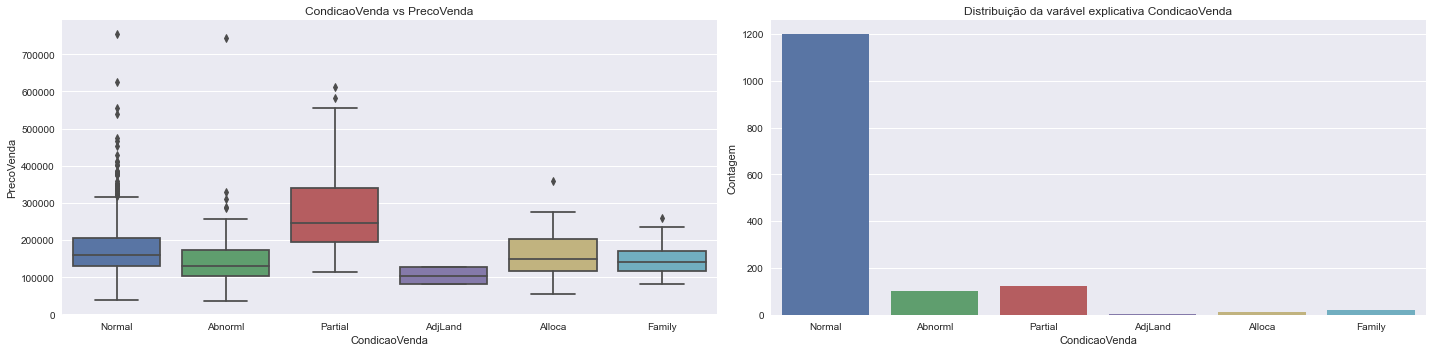

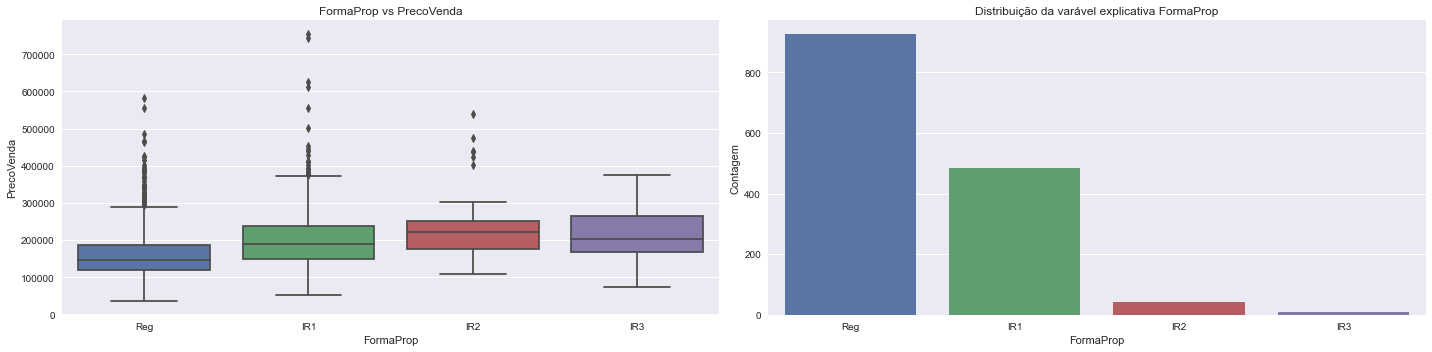

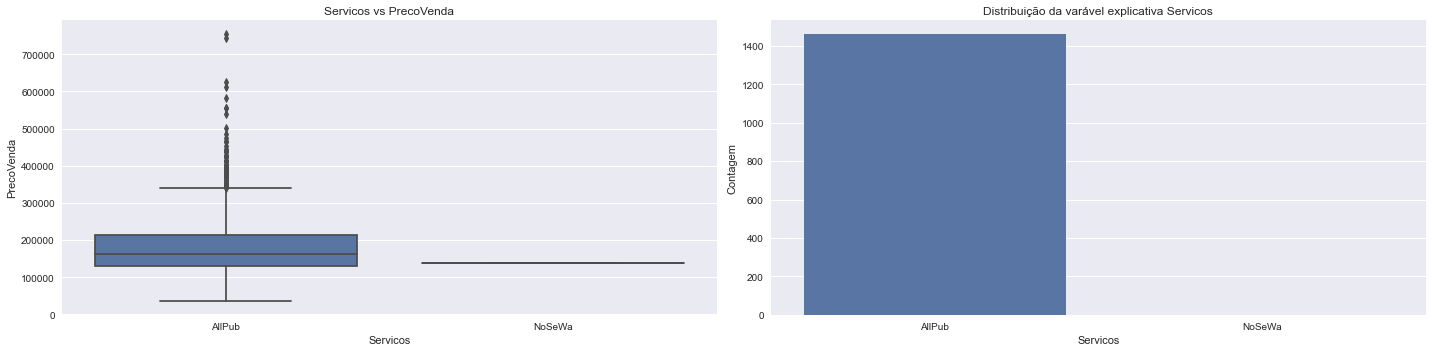

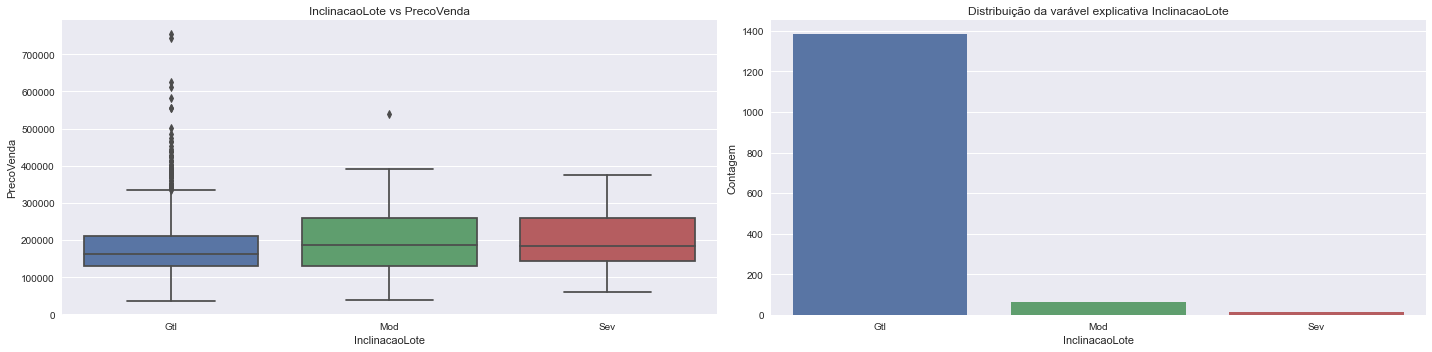

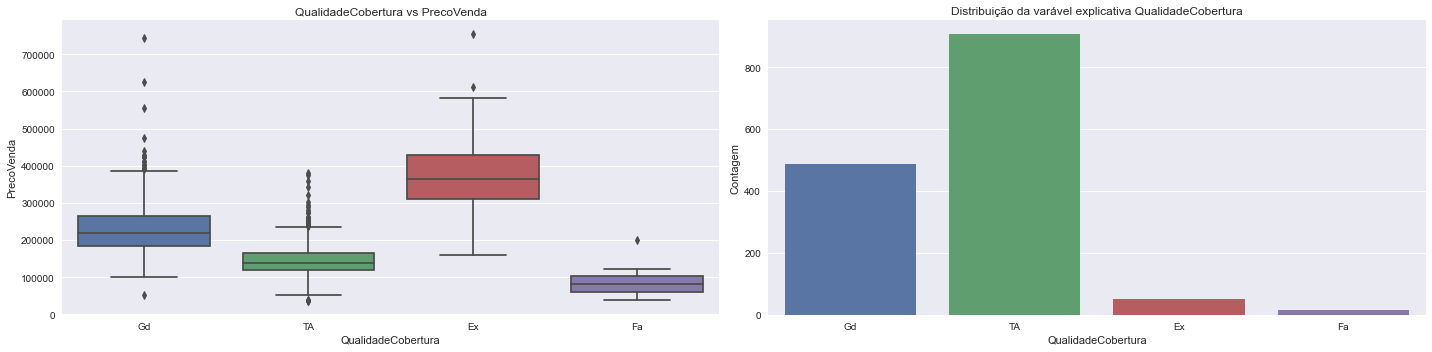

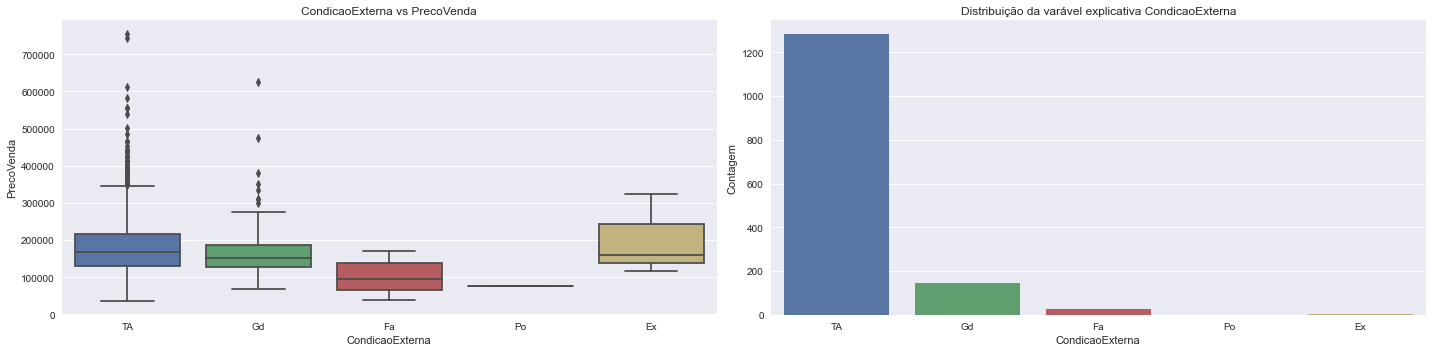

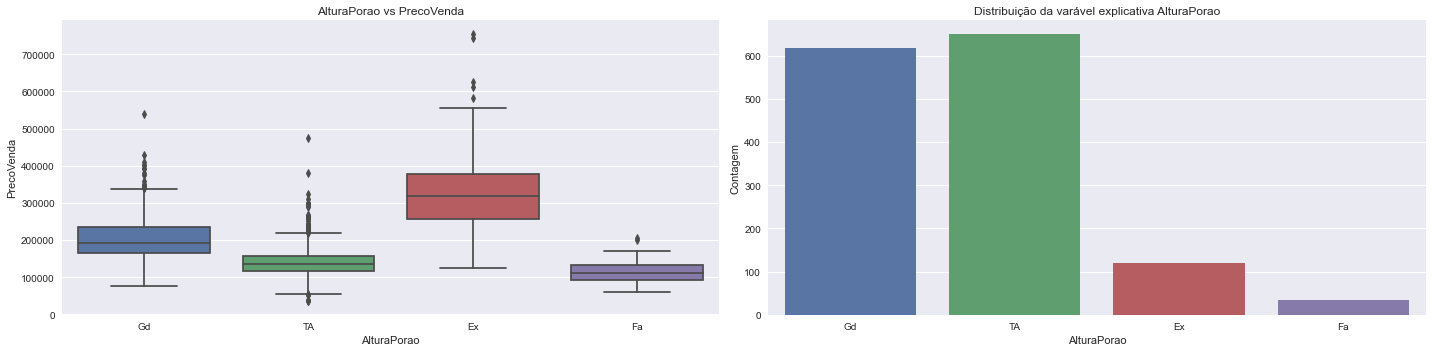

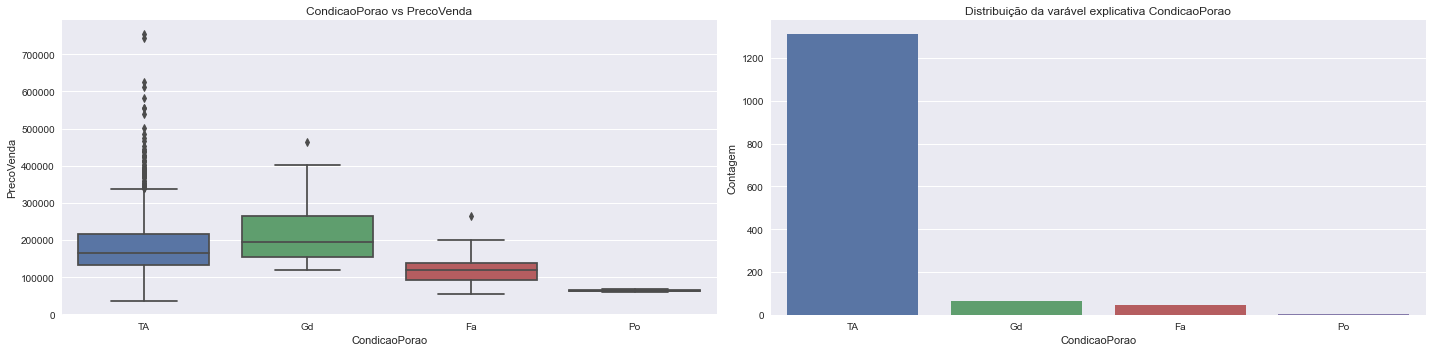

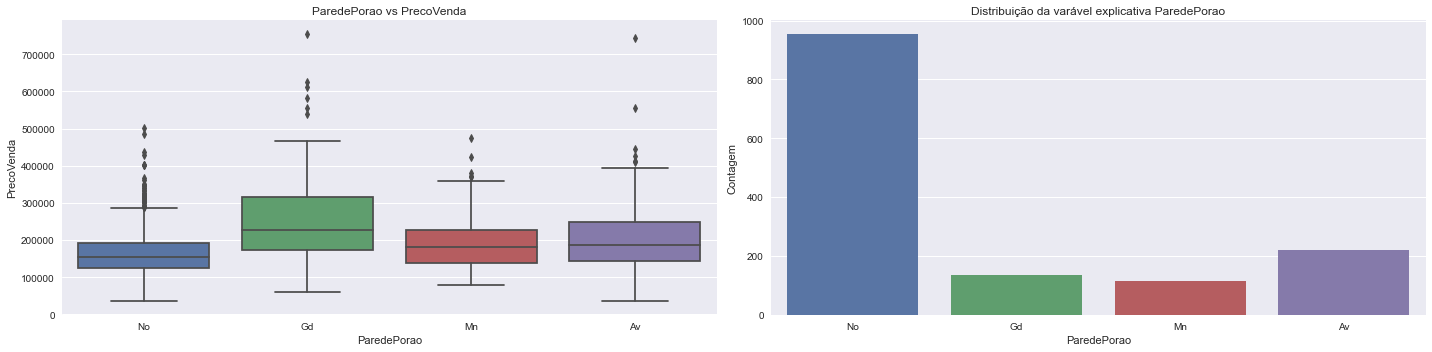

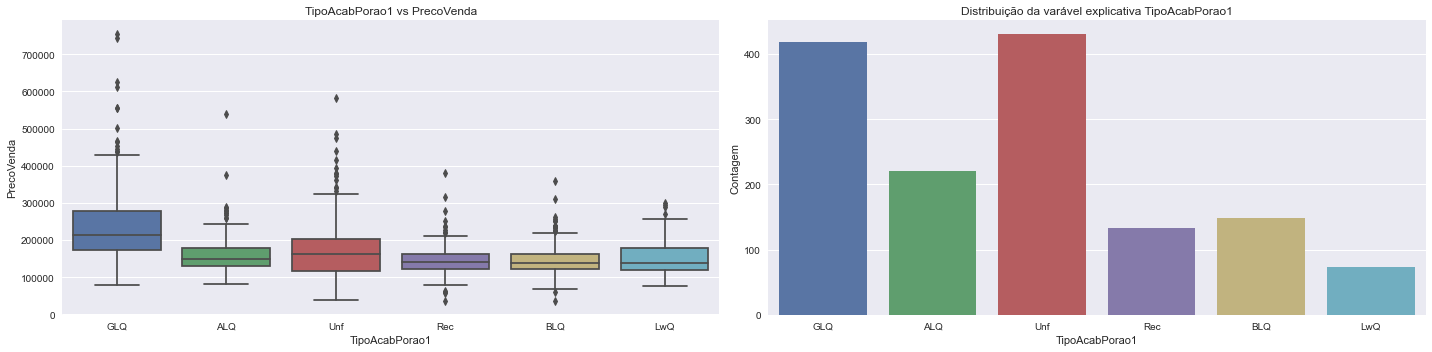

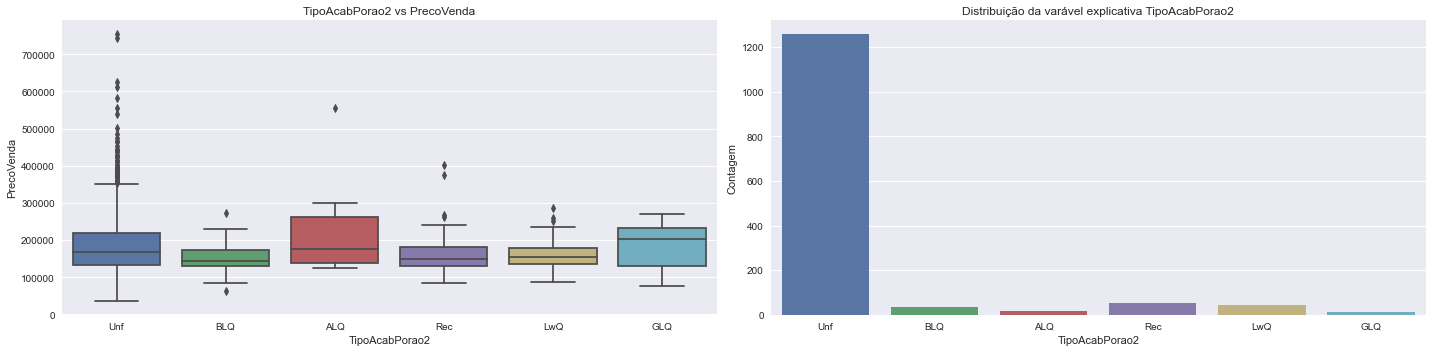

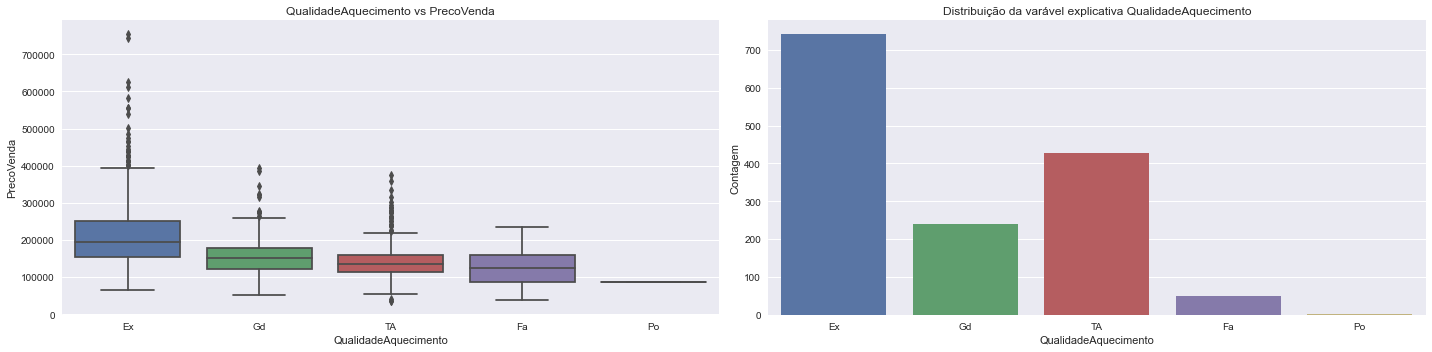

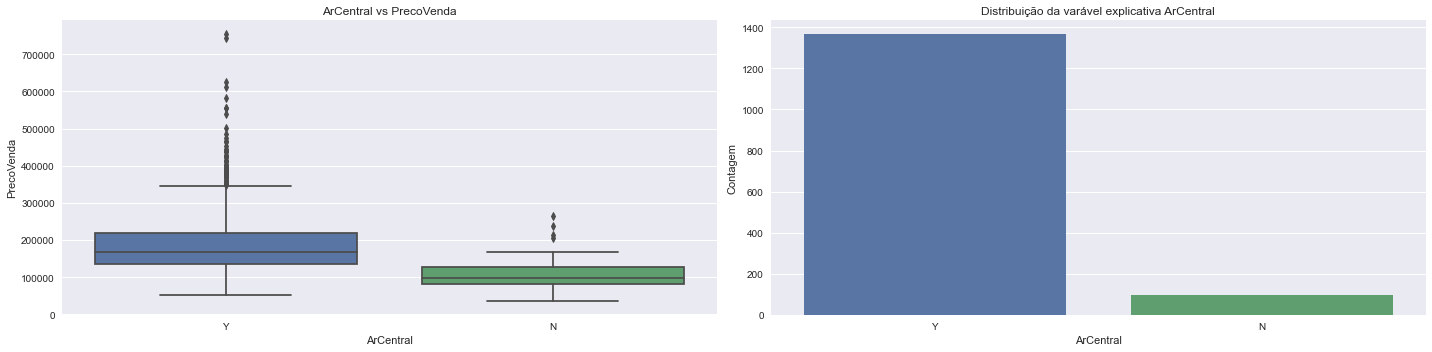

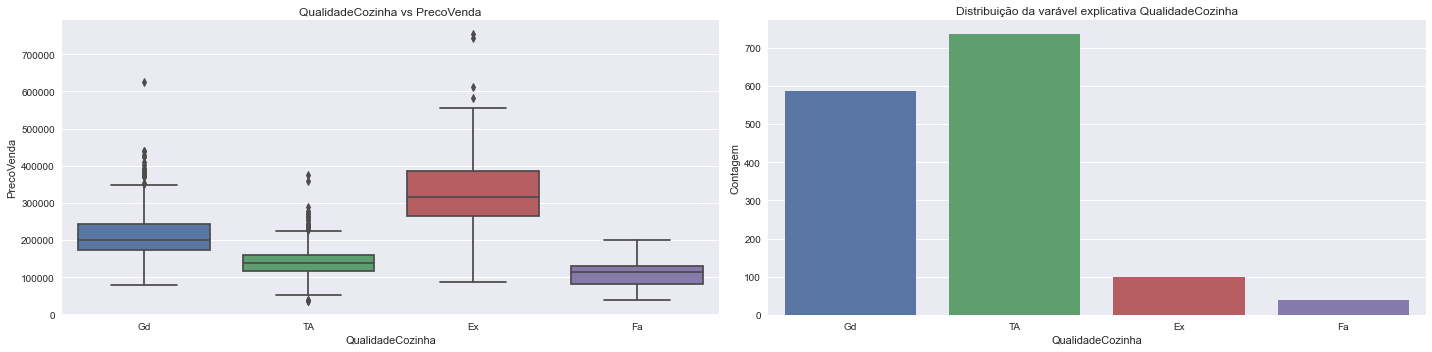

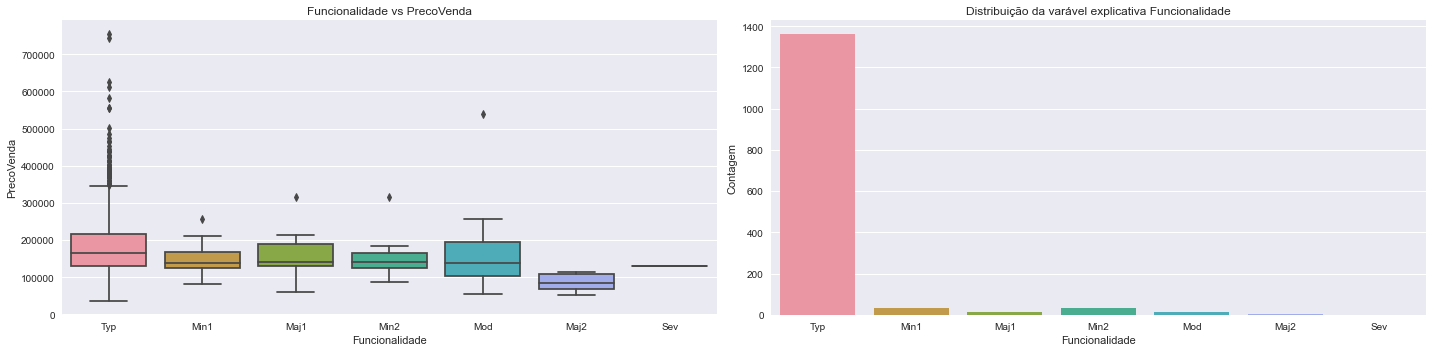

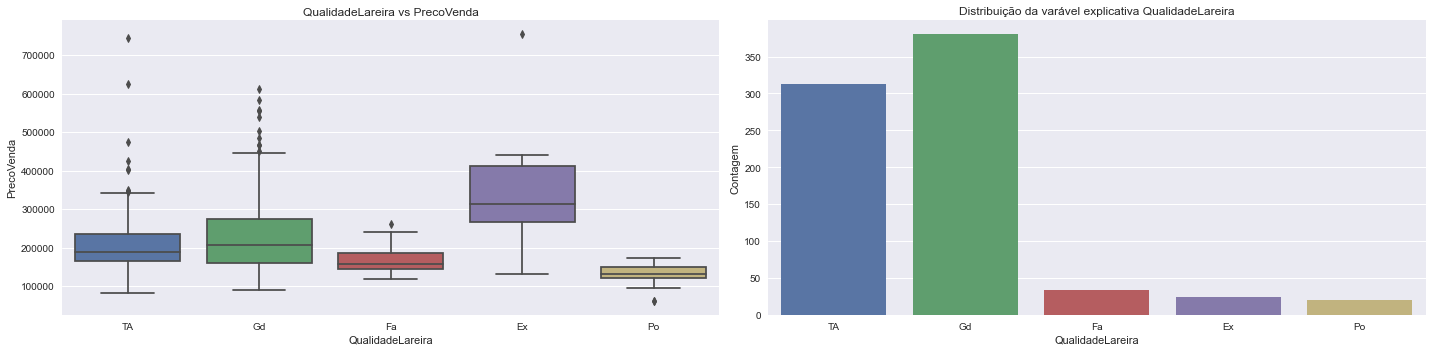

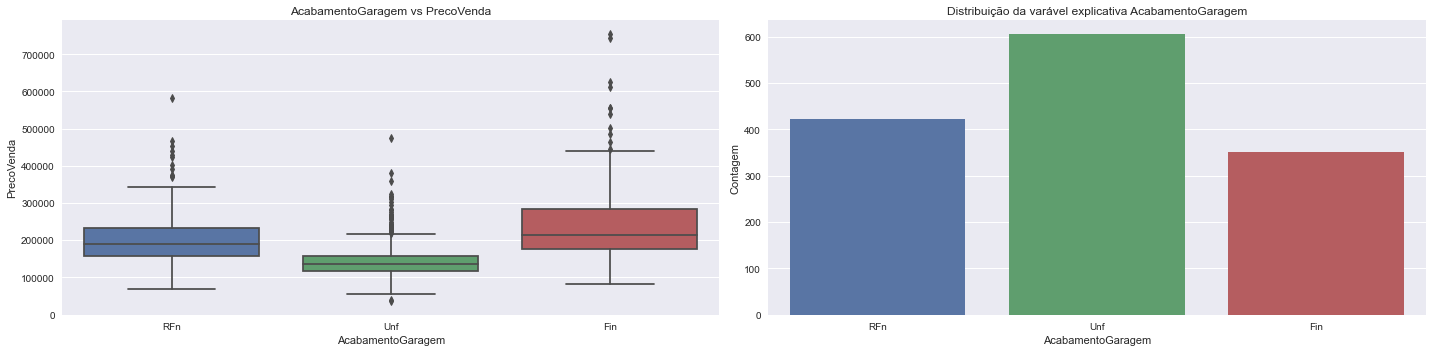

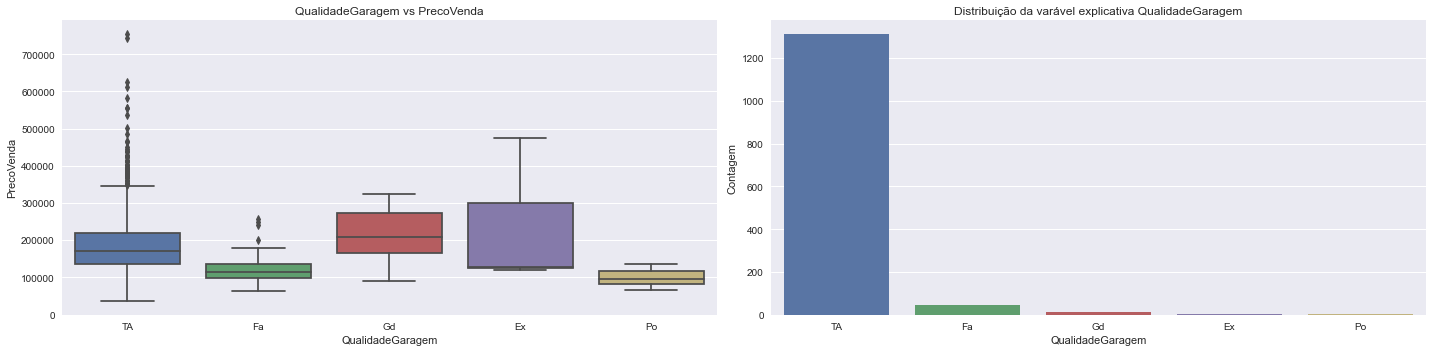

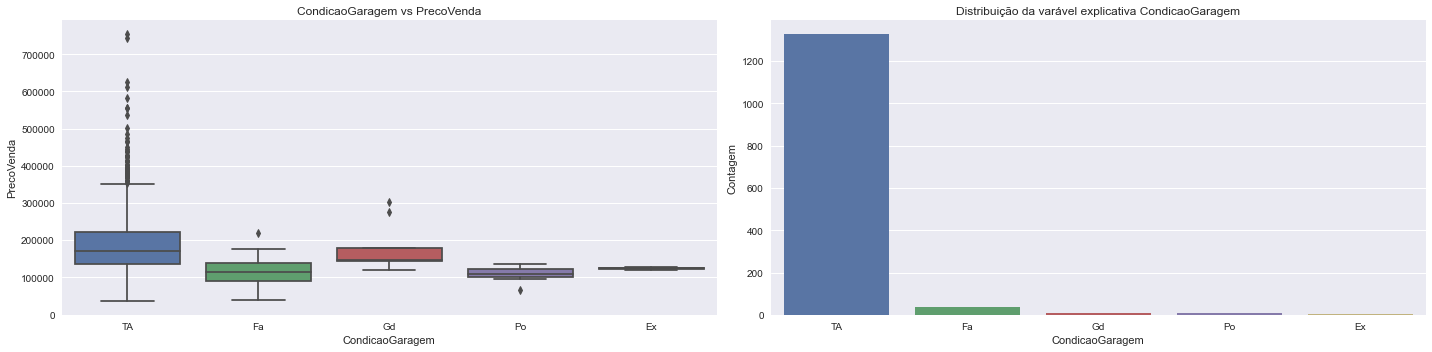

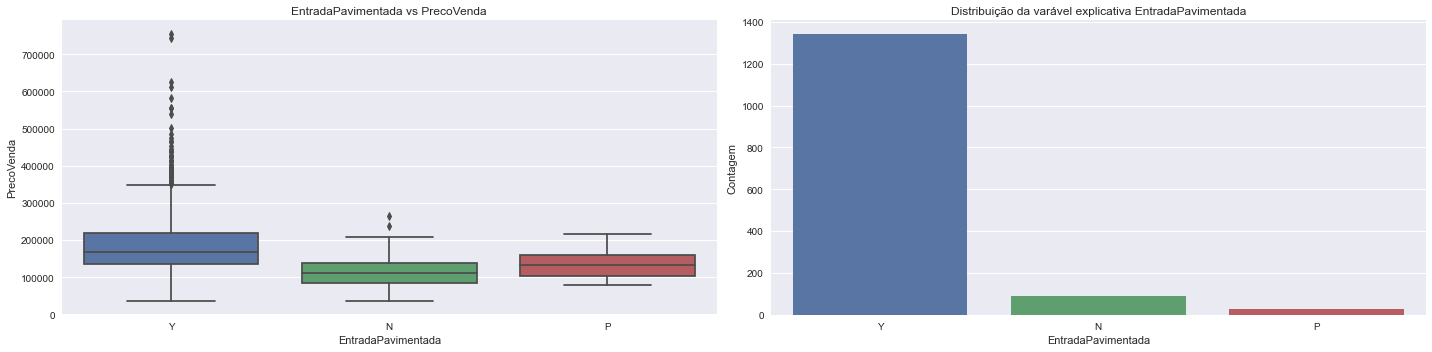

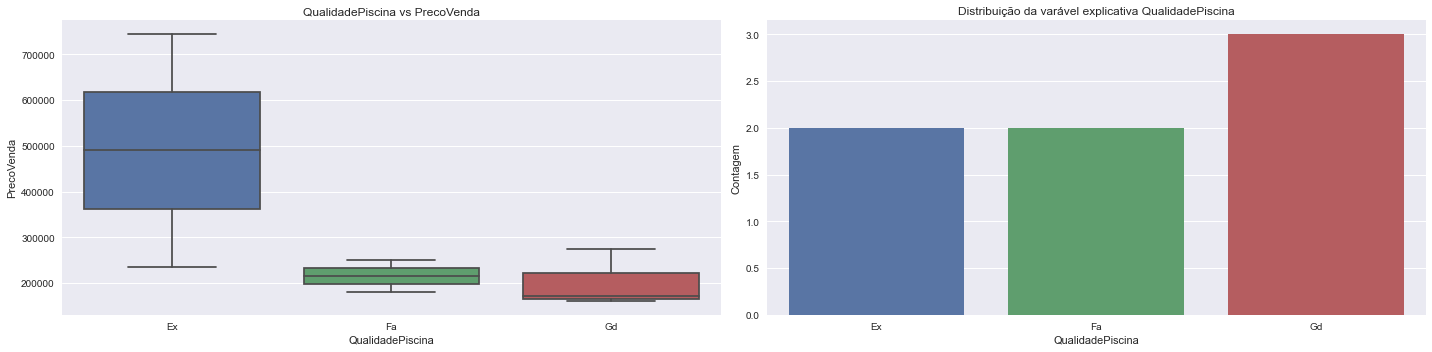

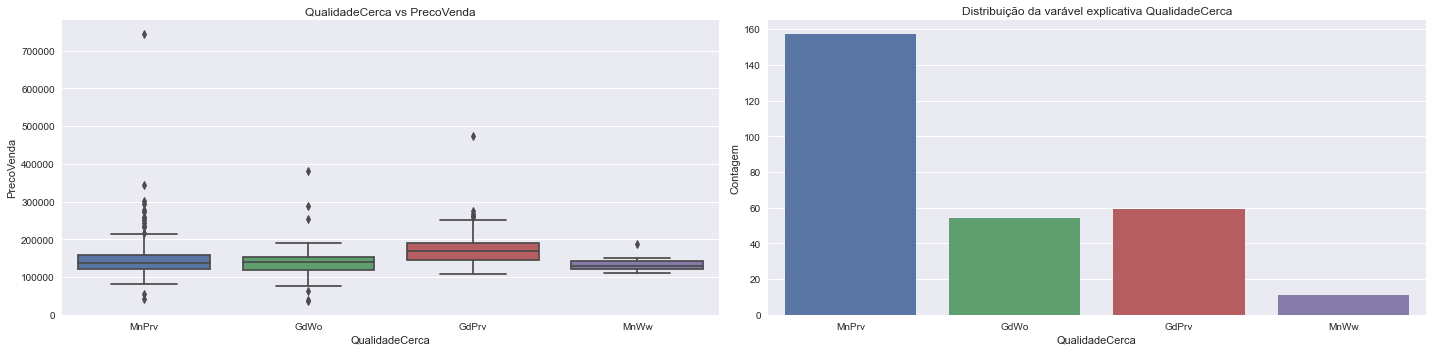

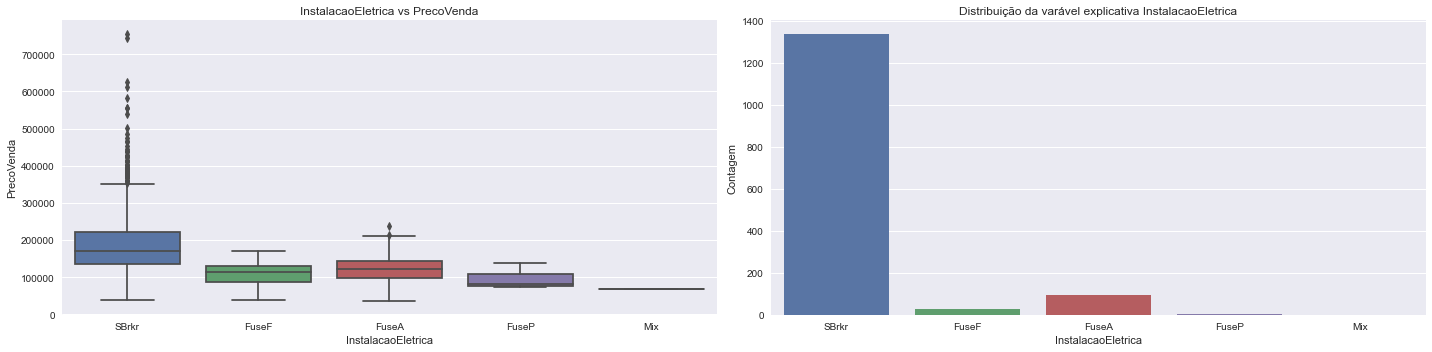

In [16]:
for variavel_explicativa in var_continua:
    reg_hist_plot(df_raw, variavel_explicativa, 'PrecoVenda')
for variavel_explicativa in var_discreta:
    box_hist_plot(df_raw, variavel_explicativa, 'PrecoVenda')
for variavel_explicativa in var_nominal:
    box_count_plot(df_raw, variavel_explicativa, 'PrecoVenda')
for variavel_explicativa in var_ordinal:
    box_count_plot(df_raw, variavel_explicativa, 'PrecoVenda')

In [17]:
df_raw[var_nominal].nunique().sort_values(ascending=False)

Bairro             25
Exterior2          16
ClasseImovel       15
Exterior1          15
MesVenda           12
TipoVenda           9
Estrada1            9
Estrada2            8
EstiloHabitacao     8
MaterialTelhado     8
LocalGaragem        6
Aquecimento         6
TipoFundacao        6
TipoTelhado         6
CondicaoVenda       6
ClasseZona          5
TipoHabitacao       5
ConfigLote          5
TipoAlvenaria       4
PlanoProp           4
Outros              4
Beco                2
Rua                 2
dtype: int64

## 5. Modelo com interpretabilidade <a name="interpretabilidade"></a>

In [18]:
df_model = df_raw[df_raw['CondicaoVenda'] == 'Normal'].copy()

In [19]:
ordinal_col_dicts = {
    'QualidadeCobertura':{'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'QualidadeAquecimento': {'Ex': 1, 'TA': 3, 'Gd': 2, 'Fa': 4, 'Po': 5},
    'FormaProp': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}
}

In [20]:
df_model=df_model.replace(ordinal_col_dicts)

In [21]:
variaveis = ['FormaProp', 'QualidadeAquecimento', 'AreaGaragem', 'Lareira', 'Banheiro', 'Lavabo']
target = 'np.log(PrecoVenda)'
formula = target + ' ~ ' + ' + '.join(variaveis)

In [22]:
print('Formula: ', formula)
modelo = smf.ols(formula = formula, data = df_model)
modelo_fit = modelo.fit()
modelo_fit.summary()

Formula:  np.log(PrecoVenda) ~ FormaProp + QualidadeAquecimento + AreaGaragem + Lareira + Banheiro + Lavabo


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(PrecoVenda)   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     455.2
Date:                Wed, 25 May 2022   Prob (F-statistic):          4.85e-304
Time:                        18:00:49   Log-Likelihood:                 215.83
No. Observations:                1198   AIC:                            -417.7
Df Residuals:                    1191   BIC:                            -382.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.3392      0.029    385.209      0.000      11.281      11.397
FormaProp                0.0566      0.010      5.397      0.000       0.036       0.077
QualidadeAquecimento    -0.0795      0.007    -12.200      0.000      -0.092      -0.067
AreaGaragem              0.0007   3.29e-05     20.866      0.000       0.001       0.001
Lareira                  0.1542      0.010     16.043      0.000       0.135       0.173
Banheiro                 0.1861      0.012     14.951      0.000       0.162       0.210
Lavabo                   0.1031      0.012      8.527      0.000       0.079       0.127
==============================================================================
Omnibus:                       41.773   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.482
Skew:                          -0.219   Prob(JB):                     7.45e-19
Kurtosis:                       4.217   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
residuos = modelo_fit.resid
y_pred = modelo_fit.fittedvalues

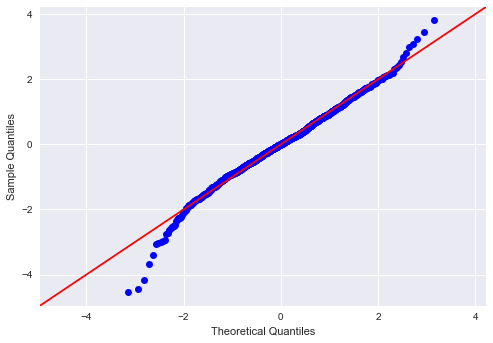

Statistics=0.990, p=0.000
A distribuição dos resíduos não parece com Gaussiana (rejeita H0)


In [24]:
sm.qqplot(residuos , line="45", fit=True, dist=stats.norm)
plt.show()

#Teste Shapiro-Wilk
stat, p = shapiro(residuos)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:print('A distribuição dos resíduos parece com Gaussiana (não rejeita H0)')
else:print('A distribuição dos resíduos não parece com Gaussiana (rejeita H0)')

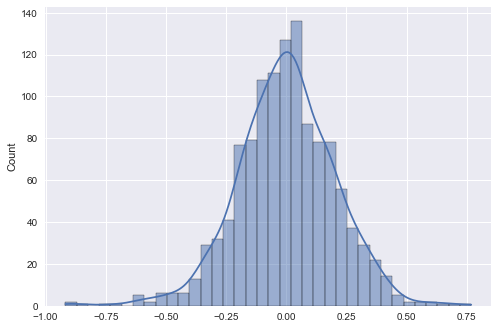

In [25]:
sns.histplot(residuos, kde=True)
plt.show()

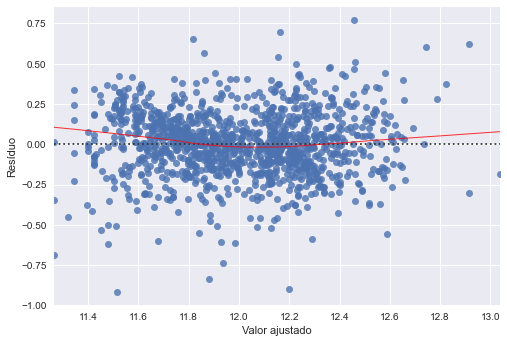

In [26]:
# GRÁFICO PARA LINEARIDADE E HOMOCEDASTICIDADE #

sns.residplot(x=y_pred, y=residuos, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#plt.axhline(y = 2, color = 'r', linestyle='--')
#plt.axhline(y = -2, color = 'r', linestyle='--')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

In [27]:
#Heteroskedasticity tests

#Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()


[('Breusch pagan statistic', 29.69344881258462), ('p-value', 4.494946586445226e-05)]

[('Goldfeld-Quandt - statistic', 0.8766367418466532), ('p-value', 0.9452551166833693)]

[('White’s statistic', 158.50513960405212), ('p-value', 1.4419461243832954e-20)]



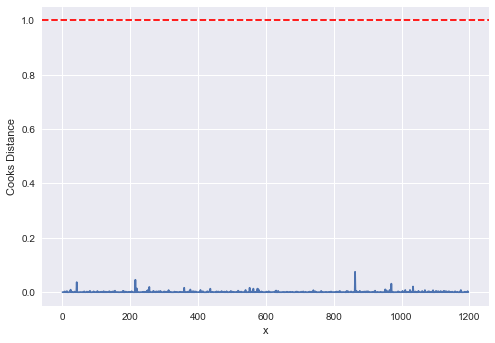

In [28]:
influence = modelo_fit.get_influence()

cooks = influence.cooks_distance

plt.plot(cooks[0])
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
list_cooks = df_model[cooks[0]>1].index.to_list()

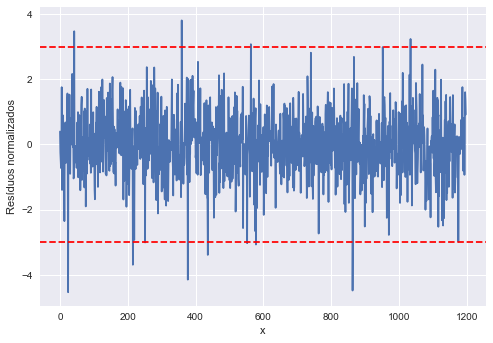

In [30]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.axhline(y = 3, color = 'r', linestyle = '--')
plt.axhline(y = -3, color = 'r', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Resíduos normalizados')
plt.show()

In [31]:
list_influence = df_model[abs(influence.resid_studentized_internal)>=3].index.to_list()

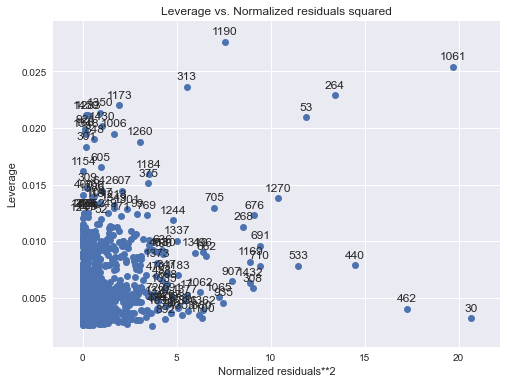

In [32]:
#Influence tests

from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(modelo_fit, ax=ax)

In [34]:
def calc_vif(df):
  """ 
    Variable Inflation Factors
    VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
    Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Fixing%20Multicollinearity-,What%20is%20Multicollinearity%3F,variable%20in%20a%20regression%20model.
  """
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return(vif)

In [35]:
vif = calc_vif(df_model[variaveis])
print(vif['VIF'].sum())
vif

29.317710165466412


variables       VIF
0             FormaProp  6.384939
1  QualidadeAquecimento  3.119117
2           AreaGaragem  7.186528
3               Lareira  2.159163
4              Banheiro  8.769602
5                Lavabo  1.698361

In [36]:
list_influence + list_cooks

[30, 53, 264, 308, 440, 462, 533, 676, 691, 710, 1061, 1270]

In [37]:
df_model.drop(labels=(list_influence + list_cooks), axis=0, inplace = True)

In [38]:
encoder = TargetEncoder()
df_model['Bairro_encoded'] = encoder.fit_transform(df_model['Bairro'], np.log(df_model['PrecoVenda']))

In [39]:
modelo = smf.ols(formula = formula, data = df_model)
modelo_fit = modelo.fit()
modelo_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(PrecoVenda)   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     489.4
Date:                Wed, 25 May 2022   Prob (F-statistic):          8.28e-316
Time:                        18:00:52   Log-Likelihood:                 292.32
No. Observations:                1186   AIC:                            -570.6
Df Residuals:                    1179   BIC:                            -535.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.3351      0.028    408.920      0.000      11.281      11.390
FormaProp                0.0647      0.010      6.501      0.000       0.045       0.084
QualidadeAquecimento    -0.0760      0.006    -12.368      0.000      -0.088      -0.064
AreaGaragem              0.0007   3.15e-05     21.702      0.000       0.001       0.001
Lareira                  0.1443      0.009     15.949      0.000       0.127       0.162
Banheiro                 0.1856      0.012     15.650      0.000       0.162       0.209
Lavabo                   0.0948      0.011      8.346      0.000       0.073       0.117
==============================================================================
Omnibus:                        1.595   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.503
Skew:                          -0.043   Prob(JB):                        0.472
Kurtosis:                       3.152   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
residuos = modelo_fit.resid
y_pred = modelo_fit.fittedvalues

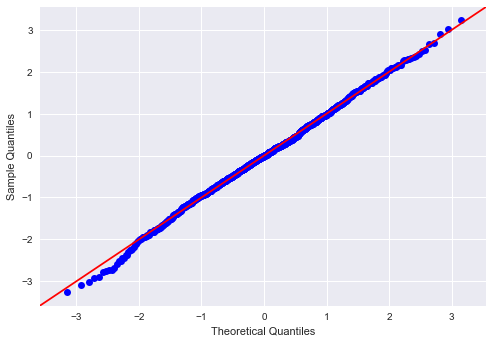

Statistics=0.998, p=0.349
A distribuição dos resíduos parece com Gaussiana (não rejeita H0)


In [41]:
sm.qqplot(residuos , line="45", fit=True, dist=stats.norm)
plt.show()

#Teste Shapiro-Wilk
stat, p = shapiro(residuos)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('A distribuição dos resíduos parece com Gaussiana (não rejeita H0)')
else:
    print('A distribuição dos resíduos não parece com Gaussiana (rejeita H0)')

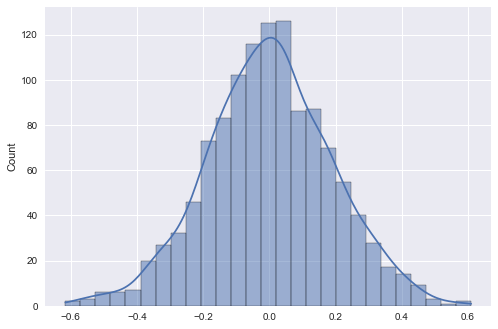

In [42]:
sns.histplot(residuos, kde=True)
plt.show()

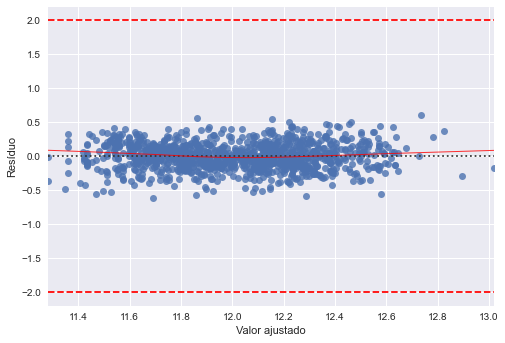

In [43]:
# GRÁFICO PARA LINEARIDADE E HOMOCEDASTICIDADE #

sns.residplot(x=y_pred, y=residuos, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y = 2, color = 'r', linestyle='--')
plt.axhline(y = -2, color = 'r', linestyle='--')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

In [44]:
#Heteroskedasticity tests

#Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()


[('Breusch pagan statistic', 25.258698752407707), ('p-value', 0.00030577021766381885)]

[('Goldfeld-Quandt - statistic', 1.0142204935891572), ('p-value', 0.43217679244290047)]

[('White’s statistic', 120.73577969452559), ('p-value', 8.091199419309206e-14)]



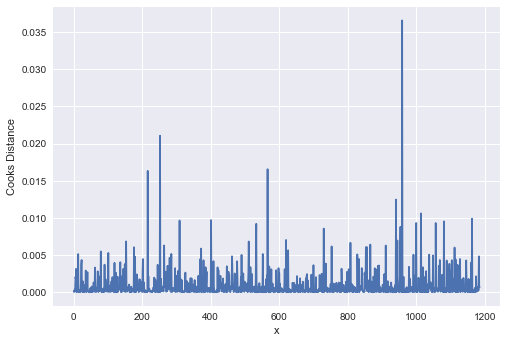

In [45]:
influence = modelo_fit.get_influence()

cooks = influence.cooks_distance

plt.plot(cooks[0])
#plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
list_cooks = df_model[cooks[0]>1].index.to_list()

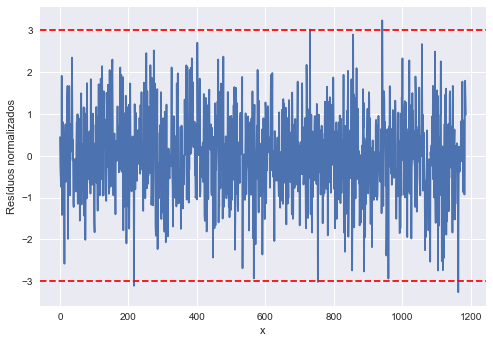

In [47]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.axhline(y = 3, color = 'r', linestyle = '--')
plt.axhline(y = -3, color = 'r', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Resíduos normalizados')
plt.show()

In [48]:
list_influence = df_model[abs(influence.resid_studentized_internal)>=3].index.to_list()

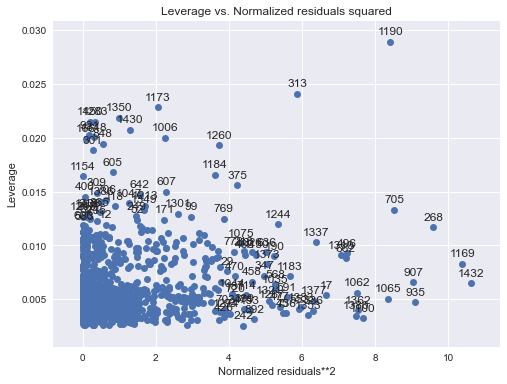

In [49]:
#Influence tests

from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(modelo_fit, ax=ax)

In [51]:
vif = calc_vif(df_model[variaveis])
print(vif['VIF'].sum())
vif

29.96142902447917


variables       VIF
0             FormaProp  6.511808
1  QualidadeAquecimento  3.127105
2           AreaGaragem  7.391157
3               Lareira  2.160024
4              Banheiro  9.070781
5                Lavabo  1.700552

## 6. Preprocessamento de Dados <a name="datacleaning"></a>

Você pode tentar o seguinte:

- Dropar colunas(features) com muitos valores faltantes

- Buscar algum erro de preenchimento no dataset

- Tente criar features (Exemplo: dividir o número de quartos pela área, elevar a área ao quadrado)

- Não remova linhas com valores faltantes, já que isso pode modificar a distribuição do dataset de validação

Esta etapa será dividia entre: 
- Remoção de outliers
- Tratamento da variável target
- Preenchimento de valores faltantes
- Criação de variáveis interessantes
- Remoção de variáveis
- Encode das variáveis categóricas ordinais

In [55]:
df_processed = df_raw.copy()

### Remoção de Outliers

Possíveis outliers identificados anteriormente.

In [56]:
df_processed[(df_processed['PrecoVenda']<300000)&(df_processed['AreaConstruida']>4000)]

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco  \
523    524            60         RL    130.0        40094  Pave  NaN   
1298  1299            60         RL    313.0        63887  Pave  NaN   

     FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1  \
523        IR1       Bnk   AllPub     Inside            Gtl  Edwards     PosN   
1298       IR3       Bnk   AllPub     Corner            Gtl  Edwards    Feedr   

     Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  \
523      PosN          1Fam          2Story         10         5   
1298     Norm          1Fam          2Story         10         5   

      AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1  \
523            2007        2008         Hip         CompShg   CemntBd   
1298           2008        2008         Hip         ClyTile    Stucco   

     Exterior2 TipoAlvenaria  AreaAlvenaria QualidadeCobertura  \
523    CmentBd         Stone          762.0                 Ex   
1298    Stucco         Stone          796.0                 Ex   

     CondicaoExterna TipoFundacao AlturaPorao CondicaoPorao ParedePorao  \
523               TA        PConc          Ex            TA          Gd   
1298              TA        PConc          Ex            TA          Gd   

     TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  AreaAcabPorao2  \
523             GLQ            2260            Unf               0   
1298            GLQ            5644            Unf               0   

      AreaInacabPorao  AreaPorao Aquecimento QualidadeAquecimento ArCentral  \
523               878       3138        GasA                   Ex         Y   
1298              466       6110        GasA                   Ex         Y   

     InstalacaoEletrica  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  \
523               SBrkr        3138        1538                   0   
1298              SBrkr        4692         950                   0   

      AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  Lavabo  Quartos  \
523             4676              1            0         3       1        3   
1298            5642              2            0         2       1        3   

      Cozinha QualidadeCozinha  TotalQuartos Funcionalidade  Lareira  \
523         1               Ex            11            Typ        1   
1298        1               Ex            12            Typ        3   

     QualidadeLareira LocalGaragem  AnoGaragem AcabamentoGaragem  \
523                Gd      BuiltIn      2007.0               Fin   
1298               Gd       Attchd      2008.0               Fin   

      CarrosGaragem  AreaGaragem QualidadeGaragem CondicaoGaragem  \
523               3          884               TA              TA   
1298              2         1418               TA              TA   

     EntradaPavimentada  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  \
523                   Y       208                406                   0   
1298                  Y       214                292                   0   

      AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina QualidadePiscina  \
523                      0             0            0              NaN   
1298                     0             0          480               Gd   

     QualidadeCerca Outros  ValorOutros  MesVenda  AnoVenda TipoVenda  \
523             NaN    NaN            0        10      2007       New   
1298            NaN    NaN            0         1      2008       New   

     CondicaoVenda  PrecoVenda  
523        Partial      184750  
1298       Partial      160000

In [57]:
df_processed[(df_processed['PrecoVenda']<300000)&(df_processed['AreaConstruida']>4000)]['Qualidade']

523     10
1298    10
Name: Qualidade, dtype: int64

In [58]:
df_processed.drop(df_processed[(df_processed['PrecoVenda']<300000)&(df_processed['AreaConstruida']>4000)].index,
                  inplace=True)

### Tratamento da variável Target

In [59]:
df_processed['PrecoVenda'] = np.log(df_processed['PrecoVenda'])

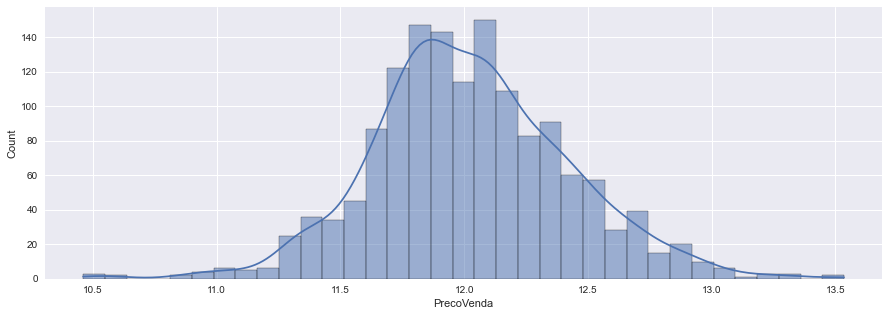

In [60]:
fig, eixo = plt.subplots(figsize=(15,5)) 
sns.histplot(df_processed['PrecoVenda'], kde=True)
plt.show()

### Valores Faltantes

In [61]:
find_missing(df_processed)

ColumnName  TotalMissing  PercentMissing
0     QualidadePiscina        1452.0           99.59
1               Outros        1404.0           96.30
2                 Beco        1367.0           93.76
3       QualidadeCerca        1177.0           80.73
4     QualidadeLareira         690.0           47.33
5              Fachada         259.0           17.76
8    AcabamentoGaragem          81.0            5.56
10        LocalGaragem          81.0            5.56
9           AnoGaragem          81.0            5.56
7      CondicaoGaragem          81.0            5.56
6     QualidadeGaragem          81.0            5.56
11      TipoAcabPorao2          38.0            2.61
12         ParedePorao          38.0            2.61
13         AlturaPorao          37.0            2.54
14       CondicaoPorao          37.0            2.54
15      TipoAcabPorao1          37.0            2.54
16       TipoAlvenaria           8.0            0.55
17       AreaAlvenaria           8.0            0.55
18  InstalacaoEletrica           1.0            0.07

De acordo com o dicionário de variáveis, temos que alguns dos missing values são, na realidade, a informação de que esta variável não é aplicável, isso é, não existe piscina, beco, cerca, lareira, porão, etc, na propriedade. Assim, pare estes casos, preencheremos com 'None'. Além disso, em outras, quando o dado estiver faltando a informação numérica associada seria 0. O AnoGaragem será definido como 0 para as propriedades sem garagem.

Neste caso, para simplificar, criarei uma função apenas para as variáveis que sabemos possuírem valores faltando. Numa situação real seria necessário desenvolver uma solução robusta para qualquer variável faltante possível, que poderia existir nos dados desconhecidos.

Como há apenas um dado faltando na nossa variável InstalacaoEletrica, irei imputar a moda desta coluna para preenchê-lo. Num caso real, isso seria feito apenas utilizando as informações do dataset de treino, no entanto, uma vez que temos uma enorme disparidade entre o dado mais comum e o restante, indepentende da divisão a moda será "SBrkr".

In [62]:
df_processed['InstalacaoEletrica'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: InstalacaoEletrica, dtype: int64

Como temos 259 valores faltantes no dataset para a variável Fachada, iremos fazer o imput após a divisão entre treino e teste, utilizando a mediana do dado do dataset de treino.

In [63]:
def mediana_fachada(df):
    return df['Fachada'].median()

In [64]:
def filling_missing(df, mediana_fachada):
    Cat_columns_fill = ['QualidadeCerca', 'QualidadeLareira', 'LocalGaragem', 
                       'AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem', 'ParedePorao', 'TipoAcabPorao2', 
                       'TipoAcabPorao1', 'CondicaoPorao', 'AlturaPorao', 'TipoAlvenaria']
    Num_columns_fill = ['AreaAlvenaria', 'AnoGaragem']
    
    df[Cat_columns_fill] = df[Cat_columns_fill].fillna('None')
    df[Num_columns_fill] = df[Num_columns_fill].fillna(0)
    
    df['InstalacaoEletrica'] = df['InstalacaoEletrica'].fillna('SBrkr')
    
    df['Fachada'] = df['Fachada'].fillna(mediana_fachada)
    
    return df

### Criação de variáveis interessantes

In [65]:
skew_features = df_processed[var_continua+var_discreta].apply(lambda x: skew(x)).sort_values(ascending=False)

In [66]:
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index.tolist()

In [67]:
skew_index

['ValorOutros',
 'AreaPiscina',
 'TamanhoLote',
 'AreaVaranda3Estacoes',
 'BaixaQualiAreaAcab',
 'Cozinha',
 'AreaAcabPorao2',
 'AreaAlpendre',
 'LavaboPorao',
 'AreaVarandaFechada',
 'AreaVarandaAberta',
 'AreaDeck',
 'AreaConstruida',
 'AreaInacabPorao',
 'AreaTerreo',
 'Area2Andar',
 'AreaAcabPorao1',
 'Condicao',
 'Lavabo',
 'TotalQuartos',
 'Lareira',
 'BanheiroPorao',
 'AreaPorao']

In [68]:
def new_features(df):
    df['AnosDesdeReforma'] = df['AnoVenda'].astype(int) - df['AnoReforma'].astype(int)
    df['IdadeConstrucao'] = df['AnoVenda'].astype(int) - df['AnoConstrucao'].astype(int)
    df['IdadeGaragem'] = df['AnoVenda'].astype(int) - df['AnoGaragem'].astype(int)
    
    
    area_features = [var for var in var_continua if 'area' in var.lower()]
    df_area_squared = df[area_features].pow(2)
    df_area_squared.columns=[var + '_squared' for var in area_features]
    df = pd.concat([df, df_area_squared], axis=1)

    df_log = np.log1p(df[skew_index])
    df_log.columns=[var + '_log' for var in skew_index]
    df = pd.concat([df, df_log], axis=1)    
    
    itens = ['Banheiro', 'Lavabo', 'TotalQuartos', 'Lareira', 'CarrosGaragem']
    df_itens_over_area = pd.DataFrame()
    for iten in itens:
        df_itens_over_area[iten+'_sobreArea'] = (df[iten])/(df['AreaConstruida'])
    df = pd.concat([df, df_itens_over_area], axis=1)
    
    return df

In [69]:
area_features = [var for var in var_continua if 'area' in var.lower()]
area_squared =[var + '_squared' for var in area_features]

In [70]:
log_features = [var + '_log' for var in skew_index]

In [71]:
itens = ['Banheiro', 'Lavabo', 'TotalQuartos', 'Lareira', 'CarrosGaragem']
var_sobreArea = []
for iten in itens:
    var_sobreArea.append(iten+'_sobreArea')

### Remoção de variáveis

As variáveis 'QualidadePiscina', 'Outros' e 'Beco' iremos remover do dataset, por possuirem mais de 90% dos dados faltantes. Mesmo que possamos assumir que os dados faltantes indicam a ausência de uma piscina ou de um beco, a concentração de dados é grande demais no caso da ausência, sem uma forte correlação que justifique mantê-los. Da mesma forma, removeremos a variável 'ValorOutros' e 'AreaPiscina', com variáveis numéricas associadas às variáveis que removemos.

Removeremos também as variáveis 'Id', assim como 'AnoVenda', uma vez que não queremos avaliar dados especificamente dos anos anteriores, mas entender a previsão dos dados futuros.

Como criamos variáveis com a idade da casa e anos desde a reforma, iremos dropar o ano em que foram feitos.

In [72]:
def drop_features(df):
    drop_cols = ['Id', 'AnoVenda', 'AnoReforma', 'AnoConstrucao', 'AnoGaragem', 'Outros', 'ValorOutros', 
                 'QualidadePiscina', 'AreaPiscina', 'Beco']
    
    return df.drop(columns=drop_cols)

In [73]:
var_nominal.remove('Outros')
var_nominal.remove('Beco')
var_ordinal.remove('QualidadePiscina')
var_continua.remove('AreaPiscina')
var_continua.remove('AnoConstrucao')
var_continua.remove('AnoReforma')
var_continua.remove('AnoGaragem')
var_discreta.remove('AnoVenda')
var_discreta.remove('ValorOutros')
skew_index.remove('AreaPiscina')
skew_index.remove('ValorOutros')
area_squared.remove('AreaPiscina_squared')
log_features.remove('AreaPiscina_log')
log_features.remove('ValorOutros_log')

In [74]:
numerical_features = var_continua + var_discreta + area_squared + var_sobreArea + log_features + \
['AnosDesdeReforma', 'IdadeConstrucao', 'IdadeGaragem']

In [75]:
numerical_features

['Fachada',
 'TamanhoLote',
 'AreaAlvenaria',
 'AreaAcabPorao1',
 'AreaAcabPorao2',
 'AreaInacabPorao',
 'AreaPorao',
 'AreaTerreo',
 'Area2Andar',
 'BaixaQualiAreaAcab',
 'AreaConstruida',
 'AreaGaragem',
 'AreaDeck',
 'AreaVarandaAberta',
 'AreaVarandaFechada',
 'AreaVaranda3Estacoes',
 'AreaAlpendre',
 'Qualidade',
 'Condicao',
 'BanheiroPorao',
 'LavaboPorao',
 'Banheiro',
 'Lavabo',
 'Quartos',
 'Cozinha',
 'TotalQuartos',
 'Lareira',
 'CarrosGaragem',
 'AreaAlvenaria_squared',
 'AreaAcabPorao1_squared',
 'AreaAcabPorao2_squared',
 'AreaInacabPorao_squared',
 'AreaPorao_squared',
 'AreaTerreo_squared',
 'Area2Andar_squared',
 'BaixaQualiAreaAcab_squared',
 'AreaConstruida_squared',
 'AreaGaragem_squared',
 'AreaDeck_squared',
 'AreaVarandaAberta_squared',
 'AreaVarandaFechada_squared',
 'AreaVaranda3Estacoes_squared',
 'AreaAlpendre_squared',
 'Banheiro_sobreArea',
 'Lavabo_sobreArea',
 'TotalQuartos_sobreArea',
 'Lareira_sobreArea',
 'CarrosGaragem_sobreArea',
 'TamanhoLote_log',

### Encode das variáveis categóricas ordinais

In [76]:
df_processed[var_nominal].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ClasseImovel     1458 non-null   int64 
 1   ClasseZona       1458 non-null   object
 2   Rua              1458 non-null   object
 3   PlanoProp        1458 non-null   object
 4   ConfigLote       1458 non-null   object
 5   Bairro           1458 non-null   object
 6   Estrada1         1458 non-null   object
 7   Estrada2         1458 non-null   object
 8   TipoHabitacao    1458 non-null   object
 9   EstiloHabitacao  1458 non-null   object
 10  TipoTelhado      1458 non-null   object
 11  MaterialTelhado  1458 non-null   object
 12  Exterior1        1458 non-null   object
 13  Exterior2        1458 non-null   object
 14  TipoAlvenaria    1450 non-null   object
 15  TipoFundacao     1458 non-null   object
 16  Aquecimento      1458 non-null   object
 17  LocalGaragem     1377 non-null   

In [77]:
ordinal_col_dicts = {
    'QualidadeCobertura':{'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'CondicaoExterna': {'TA': 3, 'Gd': 2, 'Fa': 4, 'Ex': 1, 'Po': 5},
    'AlturaPorao' : {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5, 'None':6},
    'CondicaoPorao': {'Fa': 4, 'Gd': 2, 'Po': 5, 'TA': 3,'Ex':1, 'None':6},
    'ParedePorao': {'No': 4, 'Av': 2, 'Gd': 1, 'Mn': 3,'None': 5},
    'TipoAcabPorao1': {'Unf': 6, 'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'None':7},
    'TipoAcabPorao2': {'Unf': 6, 'Rec': 4, 'LwQ': 5, 'BLQ': 3, 'ALQ': 2, 'GLQ': 1, 'None':7},
    'QualidadeAquecimento': {'Ex': 1, 'TA': 3, 'Gd': 2, 'Fa': 4, 'Po': 5},
    'ArCentral': {'Y': 1, 'N': 2},
    'InstalacaoEletrica': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5},
    'QualidadeCozinha': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'Funcionalidade': {'Typ': 1, 'Min2': 3, 'Min1': 2, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal':8},
    'QualidadeLareira': {'Gd': 2, 'TA': 3, 'Fa': 4, 'Ex': 1, 'Po': 5, 'None': 6},
    'AcabamentoGaragem': {'Unf': 3, 'RFn': 2, 'Fin': 1, 'None':4},
    'QualidadeGaragem': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Ex': 1, 'Po': 5, 'None': 6},
    'CondicaoGaragem': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Po': 5, 'Ex': 1, 'None': 6},
    'EntradaPavimentada': {'Y': 1, 'N': 3, 'P': 2},
    'FormaProp': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'Servicos': {'AllPub': 1, 'NoSeWa': 3, 'NoSewr':2, 'ELO':4},
    'InclinacaoLote': {'Gtl': 1, 'Mod': 2, 'Sev': 3}, 
    'QualidadeCerca': {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'None': 5}
}

### Função final para pré-processamento

Além do que foi abordado anteriormente, iremos também modificar os dados de ClasseImovel e de MesVenda para 'str', de modo que sejam tratados como categóricos e não numéricos.

In [78]:
def preprocess(df, treino_teste, mediana):
    df2 = df.copy()
    
    df2['ClasseImovel'] = df2['ClasseImovel'].astype('str')
    df2['MesVenda'] = df2['MesVenda'].astype('str')
    
    if treino_teste =='Treino':
        mediana = mediana_fachada(df2)
        print('A mediana da Fachada o dataset de treino é {}'.format(mediana))
        df2 = filling_missing(df2, mediana)
    else:
        df2 = filling_missing(df2, mediana) 
    
    df2 = new_features(df2)
    
    df2 = drop_features(df2)
    
    df2 = df2.replace(ordinal_col_dicts)
    
    return df2

In [79]:
df_processed.shape

(1458, 81)

### Testando função de pré-processamento

In [80]:
teste = X_train_preprocess = preprocess(df_processed, 'Treino', 0)

A mediana da Fachada o dataset de treino é 69.0


In [81]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 115 entries, ClasseImovel to CarrosGaragem_sobreArea
dtypes: float64(30), int32(3), int64(61), object(21)
memory usage: 1.3+ MB


In [82]:
teste

ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua  FormaProp PlanoProp  \
0              60         RL     65.0         8450  Pave          1       Lvl   
1              20         RL     80.0         9600  Pave          1       Lvl   
2              60         RL     68.0        11250  Pave          2       Lvl   
3              70         RL     60.0         9550  Pave          2       Lvl   
4              60         RL     84.0        14260  Pave          2       Lvl   
...           ...        ...      ...          ...   ...        ...       ...   
1455           60         RL     62.0         7917  Pave          1       Lvl   
1456           20         RL     85.0        13175  Pave          1       Lvl   
1457           70         RL     66.0         9042  Pave          1       Lvl   
1458           20         RL     68.0         9717  Pave          1       Lvl   
1459           20         RL     75.0         9937  Pave          1       Lvl   

      Servicos ConfigLote  InclinacaoLote   Bairro Estrada1 Estrada2  \
0            1     Inside               1  CollgCr     Norm     Norm   
1            1        FR2               1  Veenker    Feedr     Norm   
2            1     Inside               1  CollgCr     Norm     Norm   
3            1     Corner               1  Crawfor     Norm     Norm   
4            1        FR2               1  NoRidge     Norm     Norm   
...        ...        ...             ...      ...      ...      ...   
1455         1     Inside               1  Gilbert     Norm     Norm   
1456         1     Inside               1   NWAmes     Norm     Norm   
1457         1     Inside               1  Crawfor     Norm     Norm   
1458         1     Inside               1    NAmes     Norm     Norm   
1459         1     Inside               1  Edwards     Norm     Norm   

     TipoHabitacao EstiloHabitacao  Qualidade  Condicao TipoTelhado  \
0             1Fam          2Story          7         5       Gable   
1             1Fam          1Story          6         8       Gable   
2             1Fam          2Story          7         5       Gable   
3             1Fam          2Story          7         5       Gable   
4             1Fam          2Story          8         5       Gable   
...            ...             ...        ...       ...         ...   
1455          1Fam          2Story          6         5       Gable   
1456          1Fam          1Story          6         6       Gable   
1457          1Fam          2Story          7         9       Gable   
1458          1Fam          1Story          5         6         Hip   
1459          1Fam          1Story          5         6       Gable   

     MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  AreaAlvenaria  \
0            CompShg   VinylSd   VinylSd       BrkFace          196.0   
1            CompShg   MetalSd   MetalSd          None            0.0   
2            CompShg   VinylSd   VinylSd       BrkFace          162.0   
3            CompShg   Wd Sdng   Wd Shng          None            0.0   
4            CompShg   VinylSd   VinylSd       BrkFace          350.0   
...              ...       ...       ...           ...            ...   
1455         CompShg   VinylSd   VinylSd          None            0.0   
1456         CompShg   Plywood   Plywood         Stone          119.0   
1457         CompShg   CemntBd   CmentBd          None            0.0   
1458         CompShg   MetalSd   MetalSd          None            0.0   
1459         CompShg   HdBoard   HdBoard          None            0.0   

      QualidadeCobertura  CondicaoExterna TipoFundacao  AlturaPorao  \
0                      2                3        PConc            2   
1                      3                3       CBlock            2   
2                      2                3        PConc            2   
3                      3                3       BrkTil            3   
4                      2                3        PConc            2   
...        

## 7. Modelo preditivo <a name="preditivo"></a>

### Data preparation

In [83]:
df_predict = df_processed.copy()

In [84]:
df_predict.head()

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1            60         RL     65.0         8450  Pave  NaN       Reg   
1   2            20         RL     80.0         9600  Pave  NaN       Reg   
2   3            60         RL     68.0        11250  Pave  NaN       IR1   
3   4            70         RL     60.0         9550  Pave  NaN       IR1   
4   5            60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao  Qualidade  Condicao  AnoConstrucao  \
0          1Fam          2Story          7         5           2003   
1          1Fam          1Story          6         8           1976   
2          1Fam          2Story          7         5           2001   
3          1Fam          2Story          7         5           1915   
4          1Fam          2Story          8         5           2000   

   AnoReforma TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0        2003       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1        1976       Gable         CompShg   MetalSd   MetalSd          None   
2        2002       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3        1970       Gable         CompShg   Wd Sdng   Wd Shng          None   
4        2000       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0        

In [85]:
X = df_predict.drop(['PrecoVenda'], axis=1)
y = df_predict['PrecoVenda']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [87]:
print('X Train shape', X_train.shape)
print('X Test shape', X_test.shape)
print('X Val shape', X_val.shape)

X Train shape (1020, 80)
X Test shape (219, 80)
X Val shape (219, 80)


In [88]:
y_train_real = np.exp(y_train)
y_test_real = np.exp(y_test)
y_val_real = np.exp(y_val)

In [89]:
find_missing(X_train)

ColumnName  TotalMissing  PercentMissing
0     QualidadePiscina        1016.0           99.61
1               Outros         974.0           95.49
2                 Beco         956.0           93.73
3       QualidadeCerca         820.0           80.39
4     QualidadeLareira         467.0           45.78
5              Fachada         179.0           17.55
8     QualidadeGaragem          49.0            4.80
10     CondicaoGaragem          49.0            4.80
9    AcabamentoGaragem          49.0            4.80
7           AnoGaragem          49.0            4.80
6         LocalGaragem          49.0            4.80
11      TipoAcabPorao2          24.0            2.35
12         ParedePorao          24.0            2.35
13         AlturaPorao          23.0            2.25
14       CondicaoPorao          23.0            2.25
15      TipoAcabPorao1          23.0            2.25
16       TipoAlvenaria           6.0            0.59
17       AreaAlvenaria           6.0            0.59
18  InstalacaoEletrica           1.0            0.10

In [90]:
X_train_preprocess = preprocess(X_train, 'Treino', 0)

A mediana da Fachada o dataset de treino é 70.0


In [91]:
X_test_preprocess = preprocess(X_test, 'Teste', 70.0)
X_val_preprocess = preprocess(X_val, 'Teste', 70.0)

In [92]:
find_missing(X_train_preprocess)

Empty DataFrame
Columns: [ColumnName, TotalMissing, PercentMissing]
Index: []

### Encoding das variáveis nominais e scaling das numéricas

Uma vez que queremos avaliar a importância de cada feature no nosso modelo, optamos pelo uso de target encoding, evitando a criação de múltiplas colunas para cada dado categórico. 

In [93]:
scaller = StandardScaler()
target_enc_transformer = TargetEncoder()

In [94]:
X_train_preprocess[var_nominal] = target_enc_transformer.fit_transform(X_train_preprocess[var_nominal], y_train)
X_test_preprocess[var_nominal] = target_enc_transformer.transform(X_test_preprocess[var_nominal])
X_val_preprocess[var_nominal] = target_enc_transformer.transform(X_val_preprocess[var_nominal])

In [95]:
X_train_preprocess[numerical_features] = scaller.fit_transform(X_train_preprocess[numerical_features])
X_test_preprocess[numerical_features] = scaller.transform(X_test_preprocess[numerical_features])
X_val_preprocess[numerical_features] = scaller.transform(X_val_preprocess[numerical_features])

In [96]:
print('X Train shape', X_train_preprocess.shape)
print('X Test shape', X_test_preprocess.shape)
print('X Val shape', X_val_preprocess.shape)
print('X Train shape', y_train.shape)
print('X Test shape', y_test.shape)
print('X Val shape', y_val.shape)

X Train shape (1020, 114)
X Test shape (219, 114)
X Val shape (219, 114)
X Train shape (1020,)
X Test shape (219,)
X Val shape (219,)


### Baseline

In [97]:
scores = []

In [98]:
models = []

In [99]:
rf_baseline = RandomForestRegressor(random_state=42)

In [100]:
score_baseline = -np.mean(cross_val_score(rf_baseline, X_train_preprocess, y_train, 
                                          scoring="neg_root_mean_squared_error", cv=10))
score_baseline

0.14246569216606836

In [101]:
scores.append(score_baseline)
models.append('Baseline')

In [102]:
rf_baseline.fit(X_train_preprocess, y_train)

RandomForestRegressor(random_state=42)

### Modelos de Regressão com Hyperparameter tuning

Para rodar o código com mais rapidez após a definição dos melhores parâmetros, irei deixar apenas os parâmetros selecionados disponíveis, e as faixas em um comentário no código.

#### Regressão Linear com Regularização

In [103]:
lr = ElasticNet()
param_lr = {'alpha' : [0.0005],
            'l1_ratio' : [1]}

'''{'alpha' : [0.00025, 0.0005, 0.00075, 0.001, 0.00125],
    'l1_ratio' : [0.85, 0.9, 0.95, 0.975, 1]}'''

gs_lr = GridSearchCV(lr, param_lr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_lr.fit(X_train_preprocess, y_train)
print(gs_lr.best_params_)
print(-gs_lr.best_score_)

{'alpha': 0.0005, 'l1_ratio': 1}
0.11363874091445363


In [104]:
scores.append(-gs_lr.best_score_)
models.append('LR')

In [105]:
permutation_result_lr = permutation_importance(gs_lr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_lr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_LR': permutation_result_lr.importances_mean})
importances_lr.set_index('Feature', inplace=True)

#### Support Vector Regression (SVR)

In [106]:
svr = SVR()
param_svr = {'C' : [125],
    'epsilon' : [0.03], 
    'gamma' : [0.0002]}


'''{'C' : [50, 60, 70, 80, 90, 100, 110, 120, 125, 130],
    'epsilon' : [0.01, 0.015, 0.0175, 0.02, 0.03, 0.04], 
    'gamma' : [0.0001, 0.0002, 0.0003, 0.0004]}'''

gs_svr = GridSearchCV(svr, param_svr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_svr.fit(X_train_preprocess, y_train)
print(gs_svr.best_params_)
print(-gs_svr.best_score_)

{'C': 125, 'epsilon': 0.03, 'gamma': 0.0002}
0.11099634058275461


In [107]:
scores.append(-gs_svr.best_score_)
models.append('SVR')

In [108]:
permutation_result_svr = permutation_importance(gs_svr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_svr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_SVR': permutation_result_svr.importances_mean})
importances_svr.set_index('Feature', inplace=True)

#### Decision Tree

In [109]:
dtr = DecisionTreeRegressor(random_state=42)
param_dtr = {'min_samples_leaf' : [12], 
    'max_features' : [0.3]}

'''{'min_samples_leaf' : [3, 5, 7, 9, 10, 12, 14], 
    'max_features' : ['sqrt',0.2, 0.3, 0.4, 0.5, 0.6]}'''

gs_dtr = GridSearchCV(dtr, param_dtr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_dtr.fit(X_train_preprocess, y_train)
print(gs_dtr.best_params_)
print(-gs_dtr.best_score_)

{'max_features': 0.3, 'min_samples_leaf': 12}
0.18999750923315534


In [110]:
scores.append(-gs_dtr.best_score_)
models.append('DTR')

In [111]:
permutation_result_dtr = permutation_importance(gs_dtr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_dtr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_DTR': permutation_result_dtr.importances_mean})
importances_dtr.set_index('Feature', inplace=True)

#### Random Forest

In [112]:
rfr = RandomForestRegressor(random_state=42)
param_rfr = {'n_estimators' : [100],
             'max_depth': [20],
             'min_samples_leaf' : [2], 
             'min_samples_split':[5],
             'max_features' : [0.3], 
             'oob_score': [True]}

'''{'n_estimators' : [50, 100, 500],
    'max_depth': [10, 15, 20, 25],
    'min_samples_leaf' : [2, 5, 7], 
    'min_samples_split':[2, 5, 10],
    'max_features' : ['sqrt', 0.3, 0.4, 0.5], 
    'oob_score': [True]}'''

gs_rfr = GridSearchCV(rfr, param_rfr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_rfr.fit(X_train_preprocess, y_train)
print(gs_rfr.best_params_)
print(-gs_rfr.best_score_)

{'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'oob_score': True}
0.13547032533654096


In [113]:
scores.append(-gs_rfr.best_score_)
models.append('RFR')

In [114]:
permutation_result_rfr = permutation_importance(gs_rfr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_rfr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_RFR': permutation_result_rfr.importances_mean})
importances_rfr.set_index('Feature', inplace=True)

#### Gradient Boosting

In [115]:
gbr = GradientBoostingRegressor(random_state=42)
param_gbr = {'n_estimators':[6000], 
             'learning_rate':[0.01], 
             'max_depth':[2], 
             'max_features':['sqrt'], 
             'min_samples_leaf':[15], 
             'min_samples_split':[5], 
             'loss':['huber']}

'''{'n_estimators':[3000, 6000], 
    'learning_rate':[0.01, 0.05], 
    'max_depth':[2, 4, 6], 
    'max_features':['sqrt', 0.4], 
    'min_samples_leaf':[5, 10, 15], 
    'min_samples_split':[5, 8, 10], 
    'loss':['huber']}'''

gs_gbr = GridSearchCV(gbr, param_gbr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_gbr.fit(X_train_preprocess, y_train)
print(gs_gbr.best_params_)
print(-gs_gbr.best_score_)

{'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 6000}
0.11622692841195068


In [116]:
scores.append(-gs_gbr.best_score_)
models.append('GBR')

In [117]:
permutation_result_gbr = permutation_importance(gs_gbr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_gbr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_GBR': permutation_result_gbr.importances_mean})
importances_gbr.set_index('Feature', inplace=True)

#### Ada Boost

In [118]:
abr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

param_abr = {'n_estimators':[1000], 
             'learning_rate':[0.1], 
             'base_estimator__max_depth':[15], 
             'base_estimator__max_features':[0.4], 
             'base_estimator__min_samples_leaf':[10], 
             'base_estimator__min_samples_split':[5]}

'''{'n_estimators':[500, 1000], 
    'learning_rate':[0.01, 0.1], 
    'base_estimator__max_depth':[6, 8, 15], 
    'base_estimator__max_features':['sqrt', 0.4], 
    'base_estimator__min_samples_leaf':[5, 10, 15], 
    'base_estimator__min_samples_split':[5, 8, 10]}'''

gs_abr = GridSearchCV(abr, param_abr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_abr.fit(X_train_preprocess, y_train)
print(gs_abr.best_params_)
print(-gs_abr.best_score_)

{'base_estimator__max_depth': 15, 'base_estimator__max_features': 0.4, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 5, 'learning_rate': 0.1, 'n_estimators': 1000}
0.13561754227107856


In [119]:
scores.append(-gs_abr.best_score_)
models.append('ABR')

In [120]:
permutation_result_abr = permutation_importance(gs_abr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_abr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_ABR': permutation_result_abr.importances_mean})
importances_abr.set_index('Feature', inplace=True)

#### Bagging

In [121]:
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
param_bag = {'n_estimators':[500], 
             'max_samples':[0.5], 
             'base_estimator__max_depth':[20], 
             'base_estimator__max_features':[0.4], 
             'base_estimator__min_samples_leaf':[2], 
             'base_estimator__min_samples_split':[2]}

'''{'n_estimators':[500, 1000],
    'max_samples':[0.1, 0.5, 1], 
    'base_estimator__max_depth':[5, 10, 15, 20], 
    'base_estimator__max_features':['sqrt', 0.2, 0.3, 0.4], 
    'base_estimator__min_samples_leaf':[2, 4, 8], 
    'base_estimator__min_samples_split':[2, 4, 8]}'''

gs_bag = GridSearchCV(bag, param_bag, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_bag.fit(X_train_preprocess, y_train)
print(gs_bag.best_params_)
print(-gs_bag.best_score_)

{'base_estimator__max_depth': 20, 'base_estimator__max_features': 0.4, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'max_samples': 0.5, 'n_estimators': 500}
0.13872986066013457


In [122]:
scores.append(-gs_bag.best_score_)
models.append('BAG')

In [123]:
permutation_result_bag = permutation_importance(gs_bag, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_bag = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_BAG': permutation_result_bag.importances_mean})
importances_bag.set_index('Feature', inplace=True)

#### Light Gradient Boosting

In [124]:
lgb = LGBMRegressor(objective='regression', random_state=42)
param_lgb = {'n_estimators': [2500],
             'learning_rate':[0.01],
             'num_leaves':[6],
             'max_bin':[200],
             'bagging_fraction':[0.8],
             'bagging_freq':[4],
             'bagging_seed':[8],
             'feature_fraction':[0.2],
             'feature_fraction_seed':[8],
             'min_sum_hessian_in_leaf':[11]}

'''{'n_estimators': [500, 1000, 2500, 5000, 7000],
    'learning_rate':[0.01, 0.1],
    'num_leaves':[6, 15],
    'max_bin':[50, 100, 200],
    'bagging_fraction':[0.7, 0.8, 0.9],
    'bagging_freq':[2, 4, 6],
    'bagging_seed':[6, 8, 10],
    'feature_fraction':[0.1, 0.2, 0.3],
    'feature_fraction_seed':[6, 8, 10],
    'min_sum_hessian_in_leaf':[8, 11, 15]}'''

gs_lgb = GridSearchCV(lgb, param_lgb, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_lgb.fit(X_train_preprocess, y_train)
print(gs_lgb.best_params_)
print(-gs_lgb.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
{'bagging_fraction': 0.8, 'bagging_freq': 4, 'bagging_seed': 8, 'feature_fraction': 0.2, 'feature_fraction_seed': 8, 'learning_rate': 0.01, 'max_bin': 200, 'min_sum_hessian_in_leaf': 11, 'n_estimators': 2500, 'num_leaves': 6}
0.11859666331016758


In [125]:
scores.append(-gs_lgb.best_score_)
models.append('LGB')

In [126]:
permutation_result_lgb = permutation_importance(gs_lgb, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_lgb = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_LGB': permutation_result_lgb.importances_mean})
importances_lgb.set_index('Feature', inplace=True)

#### XGBoost

In [127]:
xgb = XGBRegressor(objective='reg:squarederror')
param_xgb = {'n_estimators': [6000],
             'learning_rate':[0.01],
             'max_depth':[5],
             'gamma' : [0.04],
             'min_child_weight':[0],
             'subsample':[0.3],
             'colsample_bytree':[0.3], 
             'nthread':[-1],
             'reg_alpha':[0.1],
             'reg_lambda':[0.5]}

'''{'n_estimators': [2000, 4000, 6000],
    'learning_rate':[0.01, 0.1],
    'max_depth':[3, 4, 6, 8],
    'gamma' : [0.04, 0.05, 0.06],
    'min_child_weight':[0, 1],
    'subsample':[0.2, 0.3, 0.5, 0.7],
    'colsample_bytree':[0.2, 0.3, 0.4, 0.7],
    'nthread':[-1],
    'reg_alpha':[0.5, 0.1],
    'reg_lambda':[0.5, 0.1]'''
    
gs_xgb = GridSearchCV(xgb, param_xgb, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_xgb.fit(X_train_preprocess, y_train)
print(gs_xgb.best_params_)
print(-gs_xgb.best_score_)

{'colsample_bytree': 0.3, 'gamma': 0.04, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 0, 'n_estimators': 6000, 'nthread': -1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.3}
0.11531956634073723


In [128]:
scores.append(-gs_xgb.best_score_)
models.append('XGB')

In [129]:
permutation_result_xgb = permutation_importance(gs_xgb, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_xgb = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_XGB': permutation_result_xgb.importances_mean})
importances_xgb.set_index('Feature', inplace=True)

### Seleção de Features e retreinando modelos

In [130]:
total_scores = pd.DataFrame({'Model' : models, 'Score': scores})

In [131]:
total_scores.sort_values('Score')

Model     Score
2       SVR  0.110996
1        LR  0.113639
9       XGB  0.115320
5       GBR  0.116227
8       LGB  0.118597
4       RFR  0.135470
6       ABR  0.135618
7       BAG  0.138730
0  Baseline  0.142466
3       DTR  0.189998

In [132]:
importances = [importances_lr,importances_svr, importances_dtr, importances_rfr, importances_gbr, 
               importances_abr, importances_bag, importances_lgb, importances_xgb]

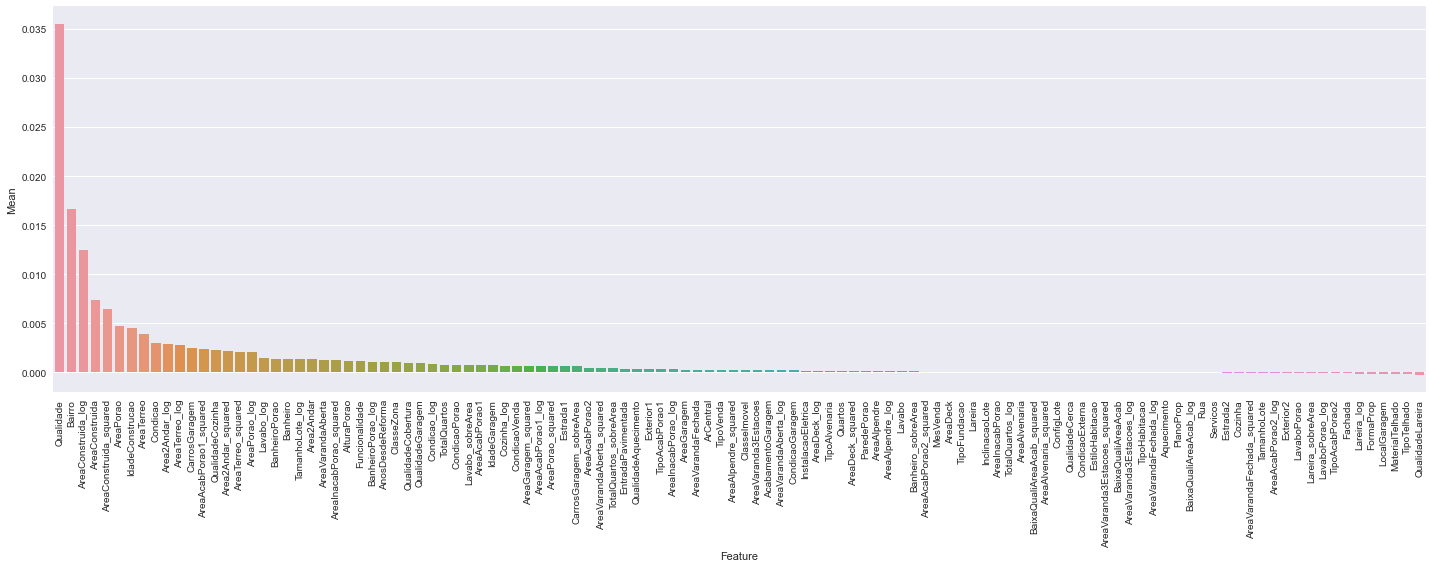

In [133]:
total_importances = pd.concat(importances, axis=1)
total_importances['Mean'] = total_importances.mean(axis=1)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='Feature', y="Mean", data=total_importances.reset_index().sort_values('Mean', ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()

In [134]:
selected_features = total_importances.sort_values('Mean', ascending=False).iloc[:80].T.columns.to_list()

In [135]:
drop_columns = []
for column in X_train_preprocess.columns.to_list():
    if column not in selected_features:
        drop_columns.append(column)

In [136]:
X_train_preprocess_selected = X_train_preprocess.drop(drop_columns, axis=1)
X_test_preprocess_selected = X_test_preprocess.drop(drop_columns, axis=1)
X_val_preprocess_selected = X_val_preprocess.drop(drop_columns, axis=1)

#### Regressão Linear com Regularização

In [137]:
lr_sel = ElasticNet(alpha = 0.0005, 
                    l1_ratio = 1)
lr_sel.fit(X_train_preprocess_selected, y_train)
score_lr_sel = (cross_val_score(lr_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_lr_sel)
score_lr_sel = -np.mean(score_lr_sel)
print(score_lr_sel)

[-0.11654197 -0.1447046  -0.10719419 -0.13400374 -0.10162663 -0.09217538
 -0.13728127 -0.10804805 -0.0906876  -0.09599728]
0.11282607150650821


In [138]:
scores.append(score_lr_sel)
models.append('LR_Sel')

#### SVR

In [139]:
svr_sel = SVR(C = 125, 
              epsilon = 0.03, 
              gamma =  0.0002)
svr_sel.fit(X_train_preprocess_selected, y_train)
score_svr_sel = (cross_val_score(svr_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_svr_sel)
score_svr_sel = -np.mean(score_svr_sel)
print(score_svr_sel)

[-0.109966   -0.14421131 -0.10460974 -0.12972225 -0.09382958 -0.08629679
 -0.1297823  -0.10559939 -0.0925937  -0.09546924]
0.1092080287960602


In [140]:
scores.append(score_svr_sel)
models.append('SVR_Sel')

#### Gradient Boosting

In [141]:
gbr_sel = GradientBoostingRegressor(random_state=42, 
                                n_estimators=6000, 
                                learning_rate=0.01, 
                                max_depth = 2, 
                                max_features = 'sqrt', 
                                min_samples_leaf = 15, 
                                min_samples_split = 5,
                                loss= 'huber')
gbr_sel.fit(X_train_preprocess_selected, y_train)
score_gbr_sel = (cross_val_score(gbr_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_gbr_sel)
score_gbr_sel = -np.mean(score_gbr_sel)
print(score_gbr_sel)

[-0.12026373 -0.15250433 -0.11186441 -0.13396623 -0.10049997 -0.11240558
 -0.1343621  -0.10389125 -0.09382287 -0.09273472]
0.11563151975613047


In [142]:
scores.append(score_gbr_sel)
models.append('GBR_Sel')

#### Light Gradient Boosting

In [143]:
lgb_sel = LGBMRegressor(objective='regression',
                        random_state=42, 
                        n_estimators=2500, 
                        learning_rate=0.01, 
                        num_leaves = 6, 
                        max_bin = 200, 
                        bagging_fraction = 0.8, 
                        bagging_freq = 4, 
                        bagging_seed = 8, 
                        feature_fraction = 0.2, 
                        feature_fraction_seed = 8,
                        min_sum_hessian_in_leaf = 11)
lgb_sel.fit(X_train_preprocess_selected, y_train)
score_lgb_sel = (cross_val_score(lgb_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_lgb_sel)
score_lgb_sel = -np.mean(score_lgb_sel)
print(score_lgb_sel)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [144]:
scores.append(score_lgb_sel)
models.append('LGB_Sel')

#### XGBoost

In [145]:
xgb_sel = XGBRegressor(objective='reg:squarederror', 
                       random_state=42, 
                       n_estimators=6000, 
                       learning_rate = 0.01, 
                       max_depth = 5, 
                       gamma = 0.04, 
                       min_child_weight=0, 
                       subsample=0.3, 
                       colsample_bytree=0.3, 
                       nthread=-1, 
                       reg_alpha=0.1, 
                       reg_lambda=0.5)
xgb_sel.fit(X_train_preprocess_selected, y_train)
score_xgb_sel = (cross_val_score(xgb_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_xgb_sel)
score_xgb_sel = -np.mean(score_xgb_sel)
print(score_xgb_sel)

[-0.12090666 -0.15357796 -0.10312187 -0.12773375 -0.11373885 -0.11596866
 -0.13806547 -0.10755866 -0.08447443 -0.08974201]
0.11548883208422793


In [146]:
scores.append(score_xgb_sel)
models.append('XGB_Sel')

### Metricas

In [147]:
total_scores = pd.DataFrame({'Model' : models, 'Score': scores})

In [148]:
total_scores.sort_values('Score')

Model     Score
11   SVR_Sel  0.109208
2        SVR  0.110996
10    LR_Sel  0.112826
1         LR  0.113639
9        XGB  0.115320
14   XGB_Sel  0.115489
12   GBR_Sel  0.115632
5        GBR  0.116227
13   LGB_Sel  0.117762
8        LGB  0.118597
4        RFR  0.135470
6        ABR  0.135618
7        BAG  0.138730
0   Baseline  0.142466
3        DTR  0.189998

### Stacked Regression Model

In [149]:
selected_models = [lr_sel, svr_sel, gbr_sel, lgb_sel, xgb_sel]

In [150]:
def mean_stacked(X):
    return ((lr_sel.predict(X) + \
             svr_sel.predict(X) + \
             gbr_sel.predict(X) + \
             lgb_sel.predict(X) + \
             xgb_sel.predict(X))/len(selected_models))

In [151]:
mean_stacked_test = mean_stacked(X_test_preprocess_selected)
np.sqrt(mean_squared_error(y_test, mean_stacked_test))

0.11886731352170829

### Stacking Regressor

In [152]:
stc = StackingCVRegressor(regressors=(selected_models),
                          meta_regressor=svr_sel,
                          use_features_in_secondary=True, 
                          random_state=0)

In [153]:
stc.fit(X_train_preprocess_selected, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

StackingCVRegressor(meta_regressor=SVR(C=125, epsilon=0.03, gamma=0.0002),
                    random_state=0,
                    regressors=[ElasticNet(alpha=0.0005, l1_ratio=1),
                                SVR(C=125, epsilon=0.03, gamma=0.0002),
                                GradientBoostingRegressor(learning_rate=0.01,
                                                          loss='huber',
                                                          max_depth=2,
                                                          max_features='sqrt',
                                                          min_samples_leaf=15,
                                                          min_samples_split=5,
                                                          n_estimators=6000,
                                                          random_state=42),
                                LGBMRegressor...
                                             interaction_constraints='',
              

In [154]:
y_test_stc = (stc.predict(X_test_preprocess_selected))
np.sqrt(mean_squared_error(y_test, y_test_stc))

0.11761962905186778

In [155]:
def blended_predictions(X):
    return ((0.15 * lr_sel.predict(X)) + \
            (0.2 * svr_sel.predict(X)) + \
            (0.1 * gbr_sel.predict(X)) + \
            (0.1 * lgb_sel.predict(X)) + \
            (0.1 * xgb_sel.predict(X)) + \
            (0.35 * stc.predict(X)))

In [156]:
model_stacked_test = blended_predictions(X_test_preprocess_selected)

In [157]:
np.sqrt(mean_squared_error(y_test, model_stacked_test))

0.1166959579502911

In [158]:
np.sqrt(mean_squared_error(y_test, mean_stacked(X_test_preprocess_selected)))

0.11886731352170829

In [159]:
for model in selected_models:
    
    print('Model:\n{}\nRMSE:\n{:.5f}\n'.format(model,
                                               np.sqrt(mean_squared_error(y_test,
                                                                          model.predict(X_test_preprocess_selected)))))

Model:
ElasticNet(alpha=0.0005, l1_ratio=1)
RMSE:
0.11733

Model:
SVR(C=125, epsilon=0.03, gamma=0.0002)
RMSE:
0.11640

Model:
GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=2,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=5, n_estimators=6000,
                          random_state=42)
RMSE:
0.12239

Model:
LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=2500,
              num_leaves=6, objective='regression', random_state=42)
RMSE:
0.13287

Model:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.04, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
 

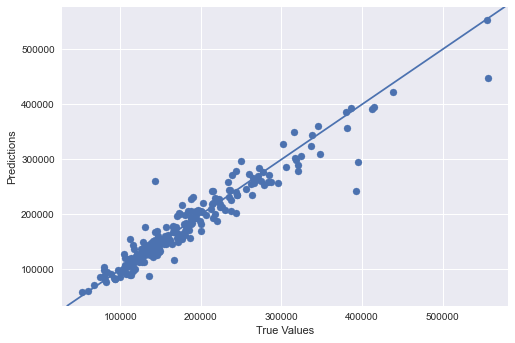

In [160]:
plt.scatter(y_test_real, np.exp(model_stacked_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axline([100000, 100000], [500000, 500000])
plt.show()

In [161]:
np.sqrt(mean_squared_error(y_val, blended_predictions(X_val_preprocess_selected)))

0.09589566082377265

In [162]:
np.sqrt(mean_squared_error(y_val, mean_stacked(X_val_preprocess_selected)))

0.09488286218648015

In [163]:
np.sqrt(mean_squared_error(y_val, stc.predict(X_val_preprocess_selected)))

0.09896212408410751

In [164]:
for model in selected_models:
    
    print('Model:\n{}\nRMSE:\n{:.5f}\n'.format(model,
                                               np.sqrt(mean_squared_error(y_val,
                                                                          model.predict(X_val_preprocess_selected)))))

Model:
ElasticNet(alpha=0.0005, l1_ratio=1)
RMSE:
0.10341

Model:
SVR(C=125, epsilon=0.03, gamma=0.0002)
RMSE:
0.10191

Model:
GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=2,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=5, n_estimators=6000,
                          random_state=42)
RMSE:
0.10011

Model:
LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=2500,
              num_leaves=6, objective='regression', random_state=42)
RMSE:
0.09888

Model:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.04, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
 

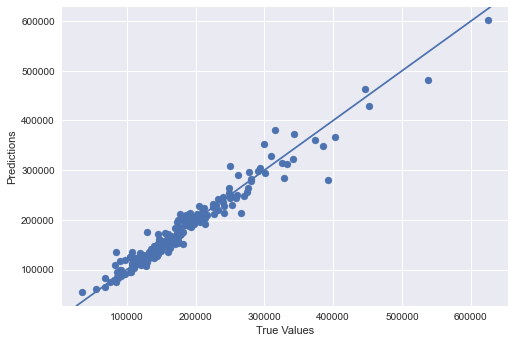

In [166]:
plt.scatter(y_val_real, np.exp(blended_predictions(X_val_preprocess_selected)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axline([100000, 100000], [500000, 500000])
plt.show()

## 8. Conclusão <a name="conclusão"></a>

## 9. Referências <a name="references"></a>